## Creat some visualizations for houses - Part A

### set up the notebook

In [1]:
# import 3rd party libraries
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import geopandas as gpd
%pip install folium
import folium
from shapely.geometry import Point

Note: you may need to restart the kernel to use updated packages.


#### We will work on Toronto dataset first

In [2]:
# import Toronto house csv file and assign it to a dataframe
T_house_data = pd.read_csv('final_merged_toronto.csv')

# check the df info
T_house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unnamed: 0.1                                            1133 non-null   int64  
 1   Unnamed: 0                                              1133 non-null   int64  
 2   neighbourhood_left                                      1133 non-null   object 
 3   unnamed: 0                                              1133 non-null   int64  
 4   street address                                          1133 non-null   object 
 5   latitude                                                1133 non-null   float64
 6   longitude                                               1133 non-null   float64
 7   geometry                                                1133 non-null   object 
 8   price                                 

##### Let's work on some visualizations

In [3]:
# let's look at the neighbourhood effects on the house price
# we need to found the neighbourhood names in our dataset and assign them to a list
neighbourhood_names = T_house_data['neighbourhood_left'].unique()
print (neighbourhood_names)
print (len(neighbourhood_names))


['agincourt north' 'agincourt south malvern west' 'alderwood' 'annex'
 'avondale' 'banbury don mills' 'bathurst manor' 'bay cloverhill'
 'bayview village' 'bayview woods steeles' 'bedford park nortown'
 'beechborough greenbrook' 'bendale glen andrew' 'birchcliffe cliffside'
 'black creek' 'blake jones' 'briar hill belgravia'
 'bridle path sunnybrook york mills' 'broadview north'
 'brookhaven amesbury' 'cabbagetown south st james town'
 'caledonia fairbank' 'casa loma' 'centennial scarborough'
 'church wellesley' 'clairlea birchmount' 'clanton park' 'cliffcrest'
 'corso italia davenport' 'danforth' 'danforth east york'
 'don valley village' 'dorset park' 'dovercourt village' 'downsview'
 'downtown yonge east' 'dufferin grove' 'east end danforth'
 'east willowdale' 'edenbridge humber valley' 'eglinton east'
 'elms old rexdale' 'englemount lawrence' 'eringate centennial west deane'
 'etobicoke city centre' 'etobicoke west mall' 'fenside parkwoods'
 'flemingdon park' 'forest hill north' 'f

##### Oops! There are 145 unique neighbourhoods in our Toronto Dataset. Recall that there are 158 neighbourhood in Toronto Open data neighbourhood geojson file. That means we can only analyze houses in 145 Toronto neighbourhoods, which results in limitation of our analysis.

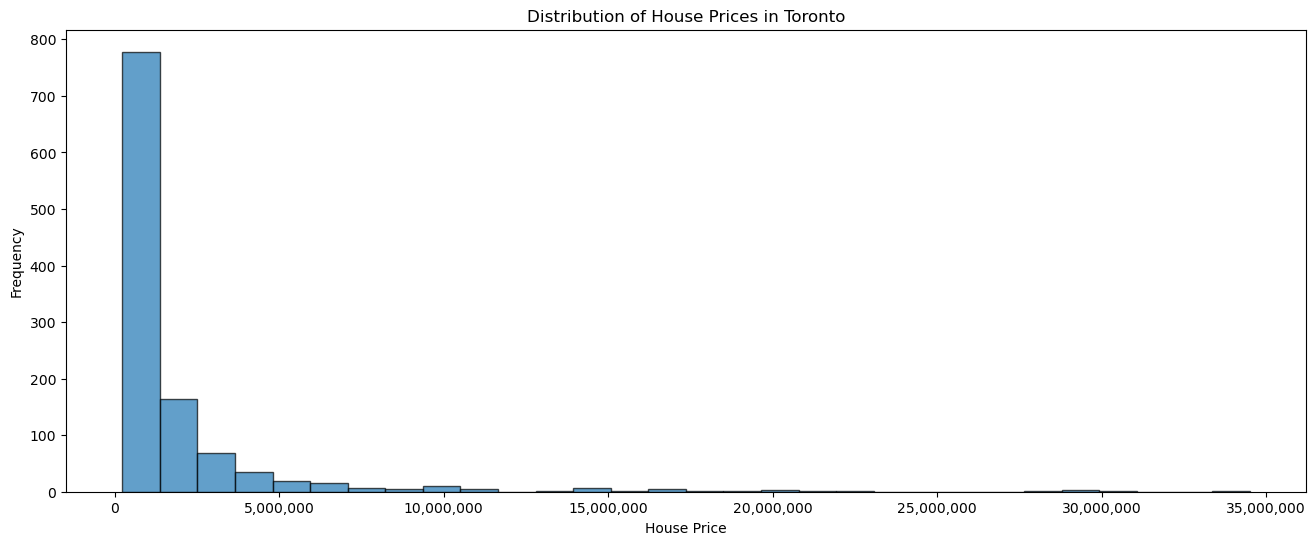

In [4]:
# let's take a look at the house price distribution first
plt.figure(figsize=(16,6))
plt.hist(T_house_data['price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of House Prices in Toronto')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

##### Observation: from the bar plot we can see most of the house price is under $5,000,000.

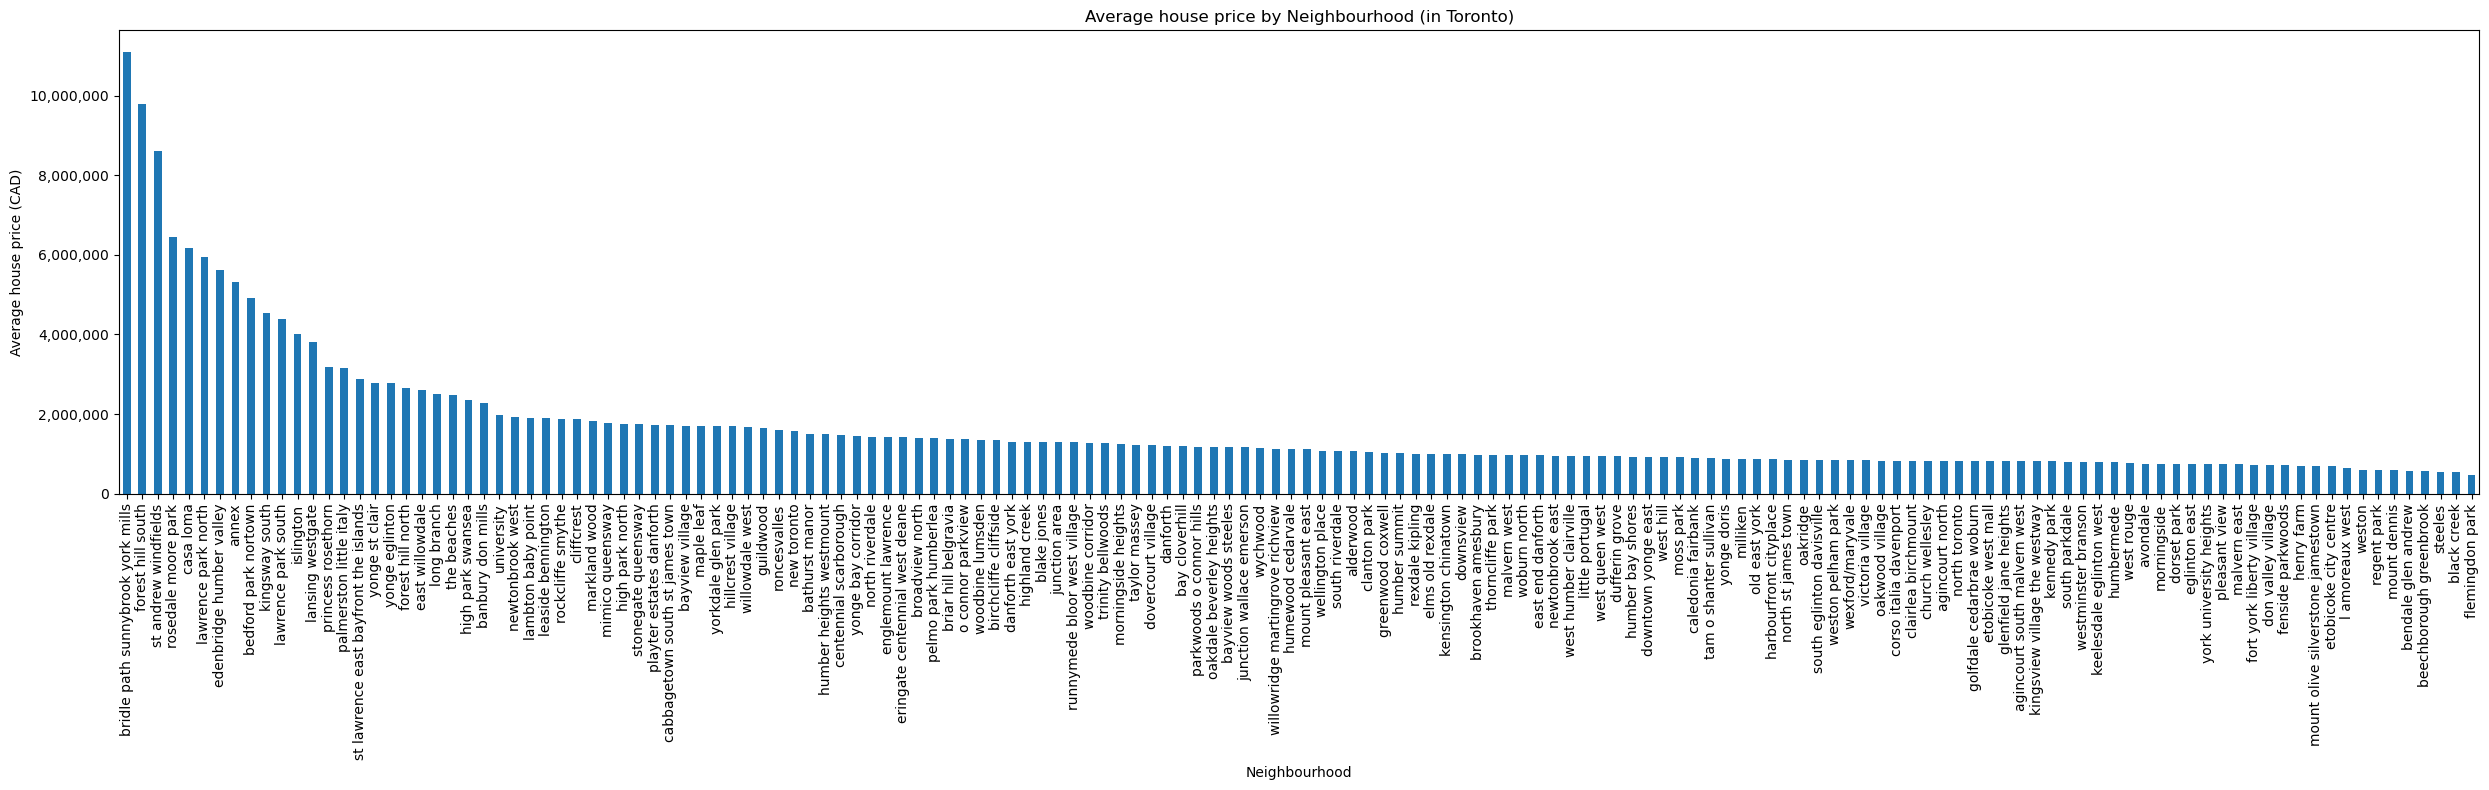

In [5]:
# let's visualize average house price in each neighbourhood

# group by neighbourhood name and calculate the mean house price
avg_price_in_hood = T_house_data.groupby('neighbourhood_left')['price'].mean().sort_values(ascending=False)

# plot the average house price for each neighbourhood
plt.figure(figsize=(25,8))
avg_price_in_hood.plot(kind='bar', legend=False)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xlabel('Neighbourhood')
plt.ylabel('Average house price (CAD)')
plt.title('Average house price by Neighbourhood (in Toronto)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### Plot bedrooms and bathrooms vs house price.

/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_92038/3443703399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=T_house_data, palette='Blues')
/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_92038/3443703399.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bathrooms', y='price', data=T_house_data, palette='Greens')


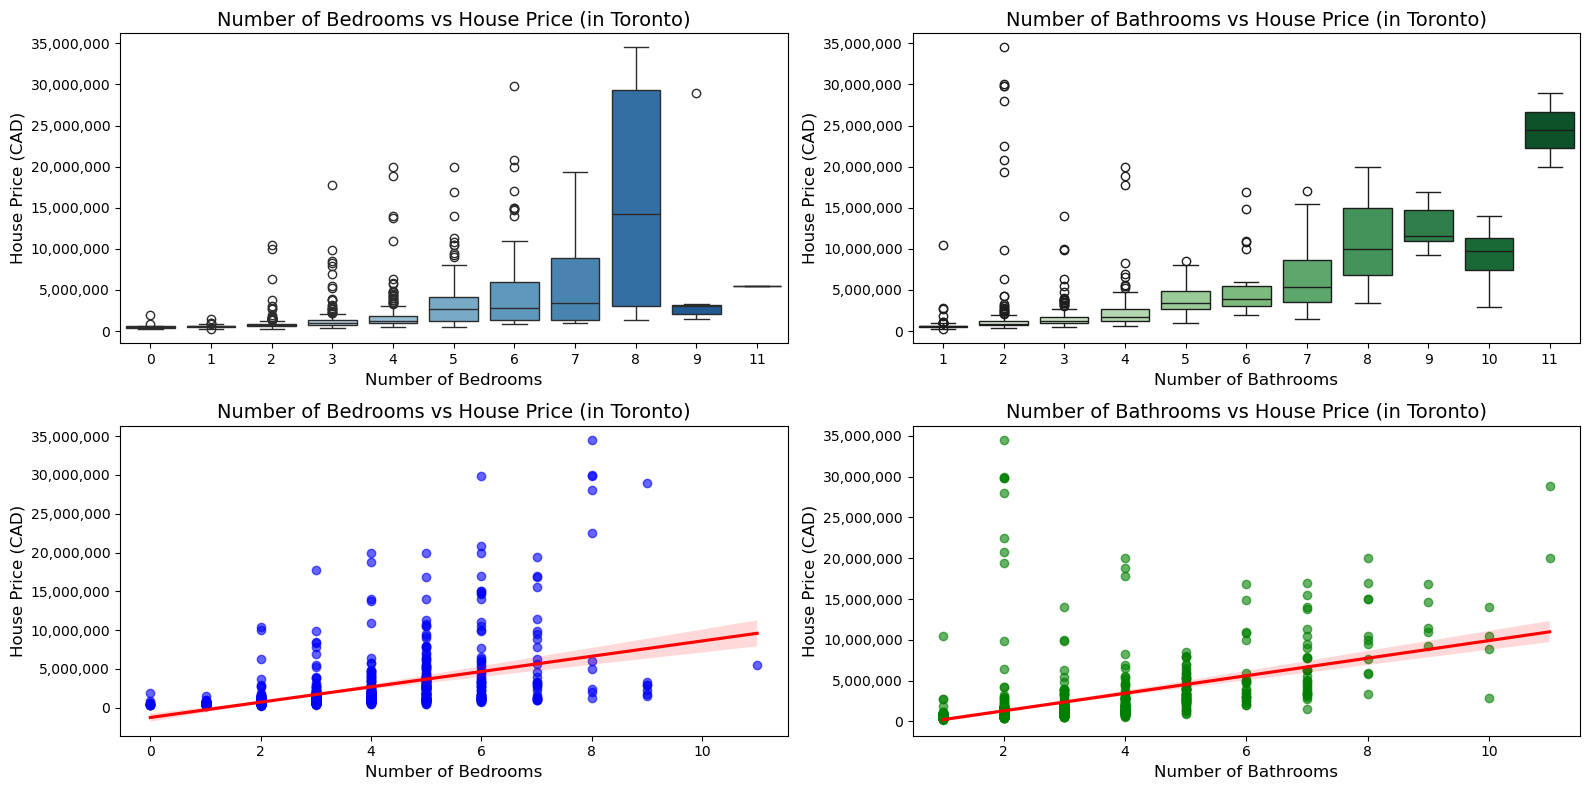

In [6]:
# Let's create box plots and scatter plot with trend line to see how bedrooms and bathrooms can affect house price
# box plot for number of bedrooms vs. house price 
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1) 
sns.boxplot(x='bedrooms', y='price', data=T_house_data, palette='Blues')
plt.title('Number of Bedrooms vs House Price (in Toronto)', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# box plot for number of bathrooms vs house price
plt.subplot(2, 2, 2)
sns.boxplot(x='bathrooms', y='price', data=T_house_data, palette='Greens')
plt.title('Number of Bathrooms vs House Price (in Toronto)', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# scatter plot for number of bedrooms vs house price
plt.subplot(2, 2, 3)
sns.regplot(data=T_house_data, x='bedrooms', y='price', scatter_kws= {'color': 'blue', 'alpha': 0.6 }, line_kws={'color': 'red'})
plt.title('Number of Bedrooms vs House Price (in Toronto)', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


# scatter plot for number of bathrooms vs house price
plt.subplot(2, 2, 4)
sns.regplot(data=T_house_data, x='bathrooms', y='price', scatter_kws={'color': 'green', 'alpha': 0.6 }, line_kws={'color': 'red'})
plt.title('Number of Bathrooms vs House Price (in Toronto)', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


# Show the plots
plt.tight_layout()
plt.show()


##### Observation: (1) from the clear upward trend in the scatter plots, we can see more bedrooms/bathrooms are associated with higher house prices. Thus, they are strongly correlated with house price. (2) There are some outliers in both bedrooms/bathrooms vs price plot. Some houses have 0 bedroom, this might because the square footage of the house.(eg. it might be a studio). Moreover, the extreme outlier at higher bedroom and bathroom counts incidates the house is likely a luxury/high-end properties.

##### We also want to see how bedroom+bathroom combination will affect the house price.

In [7]:
# Let's create a few more features based on bedroom and bathroom 
T_house_data['beds&baths'] = T_house_data['bedrooms'].astype(str) + ' bed & ' + T_house_data['bathrooms'].astype(str) + ' bath'
T_house_data['total_rooms'] = T_house_data['bedrooms'] + T_house_data['bathrooms']
T_house_data['bed_proportion'] = round(T_house_data['bedrooms']/T_house_data['total_rooms']*100).astype(str)+ ' % '
T_house_data['bath_proportion'] = round(T_house_data['bathrooms']/T_house_data['total_rooms']*100).astype(str) + ' %'
T_house_data['bed/bath_proportion'] = T_house_data['bed_proportion'].astype(str) + ' & ' + T_house_data['bath_proportion'].astype(str)

# preview the df
T_house_data.head()

,Unnamed: 0.1,Unnamed: 0,neighbourhood_left,unnamed: 0,street address,latitude,longitude,geometry,price,bedrooms,...,Total Facilities 1500,public_transit_best_buffer_area_0.5_values,restaurants_best_buffer_area_0.5_values,public_service_best_buffer_area_0.5_values,other_dailylife_facilities_best_buffer_area_0.5_values,beds&baths,total_rooms,bed_proportion,bath_proportion,bed/bath_proportion
0,0,0,agincourt north,639,435 middlefield rd #56,43.808839,-79.256579,POINT (640226.2005509724 4852118.588431975),848800,4,...,58,8,0,0,0,4 bed & 4 bath,8,50.0 %,50.0 %,50.0 % & 50.0 %
1,1,1,agincourt north,755,78 ashridge dr,43.815736,-79.268628,POINT (639241.0382690977 4852864.261428865),998000,5,...,97,12,0,1,0,5 bed & 3 bath,8,62.0 %,38.0 %,62.0 % & 38.0 %
2,2,2,agincourt north,873,48 ardgowan cres,43.812243,-79.271403,POINT (639025.9696566293 4852471.639622301),898000,4,...,88,5,4,4,0,4 bed & 3 bath,7,57.0 %,43.0 %,57.0 % & 43.0 %
3,3,3,agincourt north,1082,119 - 5235 finch ave e,43.809932,-79.254877,POINT (640360.5362696599 4852242.870013357),560000,3,...,61,9,0,0,0,3 bed & 2 bath,5,60.0 %,40.0 %,60.0 % & 40.0 %
4,4,4,agincourt south malvern west,477,60 manorglen cres,43.780125,-79.271026,POINT (639130.8167991819 4848905.055121312),1199000,4,...,127,1,0,0,0,4 bed & 3 bath,7,57.0 %,43.0 %,57.0 % & 43.0 %


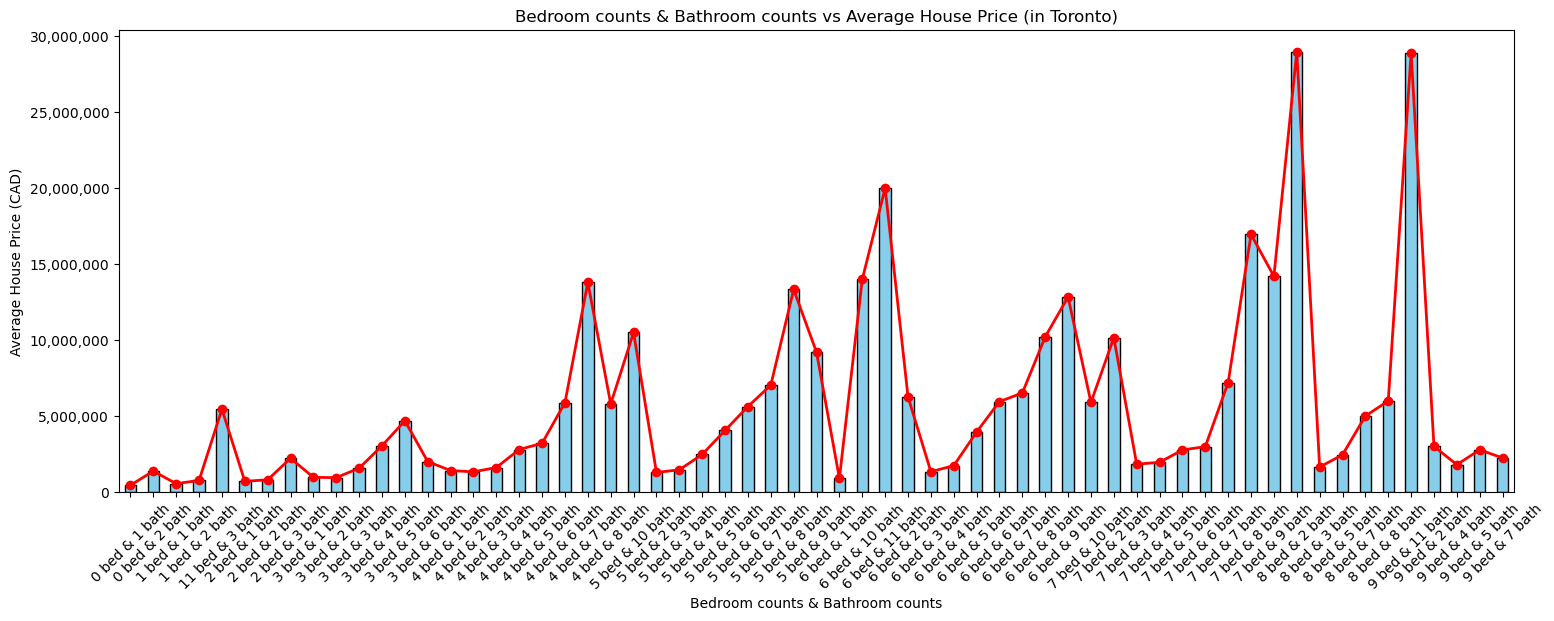

In [8]:
# Now, let's see how # of beds and # of baths combinations can affect the house price
# Group by the 'beds&baths' and calculate the mean price
beds_baths_counts = T_house_data.groupby('beds&baths')['price'].mean()

# Sort the results by ratio for better visualization
beds_baths_counts = beds_baths_counts.sort_index()

# create the bar plot
plt.figure(figsize=(18, 6))
beds_baths_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bedroom counts & Bathroom counts vs Average House Price (in Toronto)')
plt.xlabel('Bedroom counts & Bathroom counts')
plt.ylabel('Average House Price (CAD)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# add a trend line for the bar plot
plot_x = range(len(beds_baths_counts))
plot_y = beds_baths_counts.values
plt.plot(plot_x, plot_y, color='red', marker='o', linewidth=2, label='Connecting Line')

plt.xticks(rotation=45)
plt.show()

/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_92038/1283702549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='total_rooms', y='price', data=T_house_data, palette='Blues')


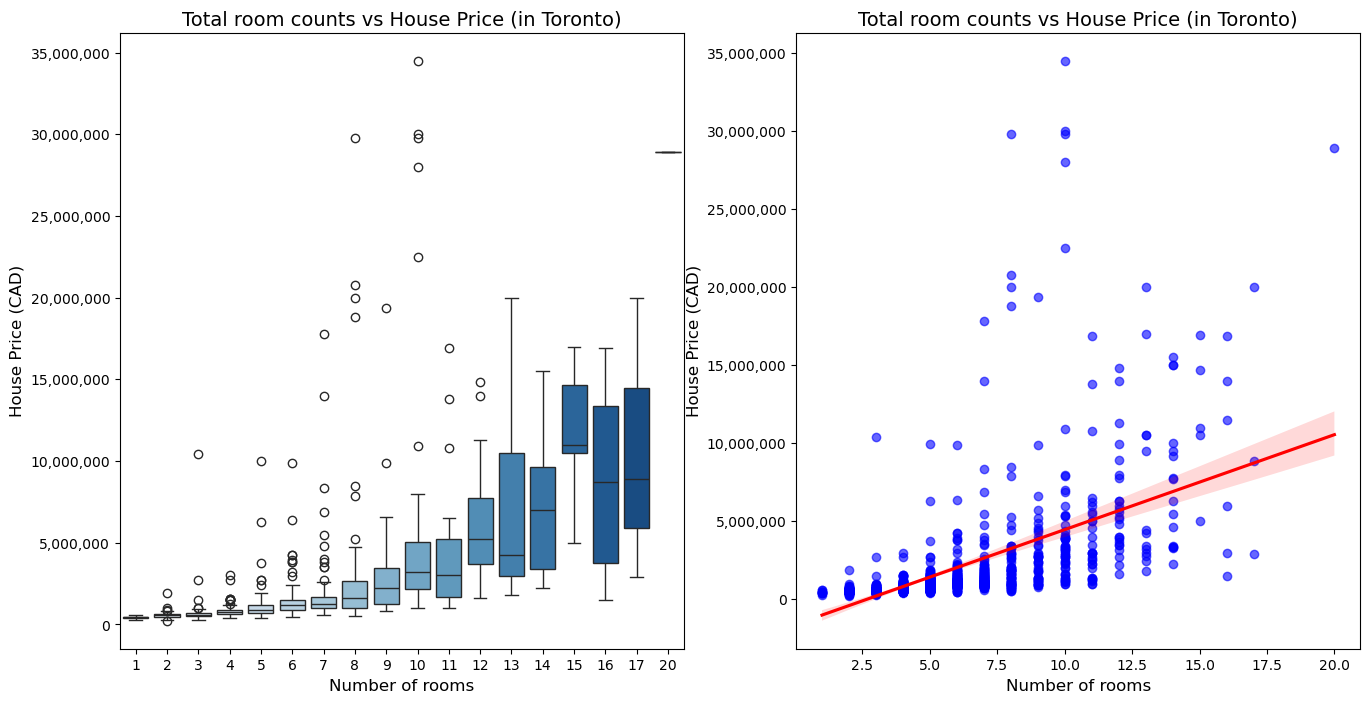

In [9]:
# Plot total room counts vs house price
# box plot for total room counts vs house price
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1) 
sns.boxplot(x='total_rooms', y='price', data=T_house_data, palette='Blues')
plt.title('Total room counts vs House Price (in Toronto)', fontsize=14)
plt.xlabel('Number of rooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# scatter plot for total room counts vs house price
plt.subplot(1, 2, 2)
sns.regplot(data=T_house_data, x='total_rooms', y='price', scatter_kws= {'color': 'blue', 'alpha': 0.6 }, line_kws={'color': 'red'})
plt.title('Total room counts vs House Price (in Toronto)', fontsize=14)
plt.xlabel('Number of rooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_92038/1914817992.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bed_proportion', y='price', data=bed_proportion_sorted, palette='Blues')


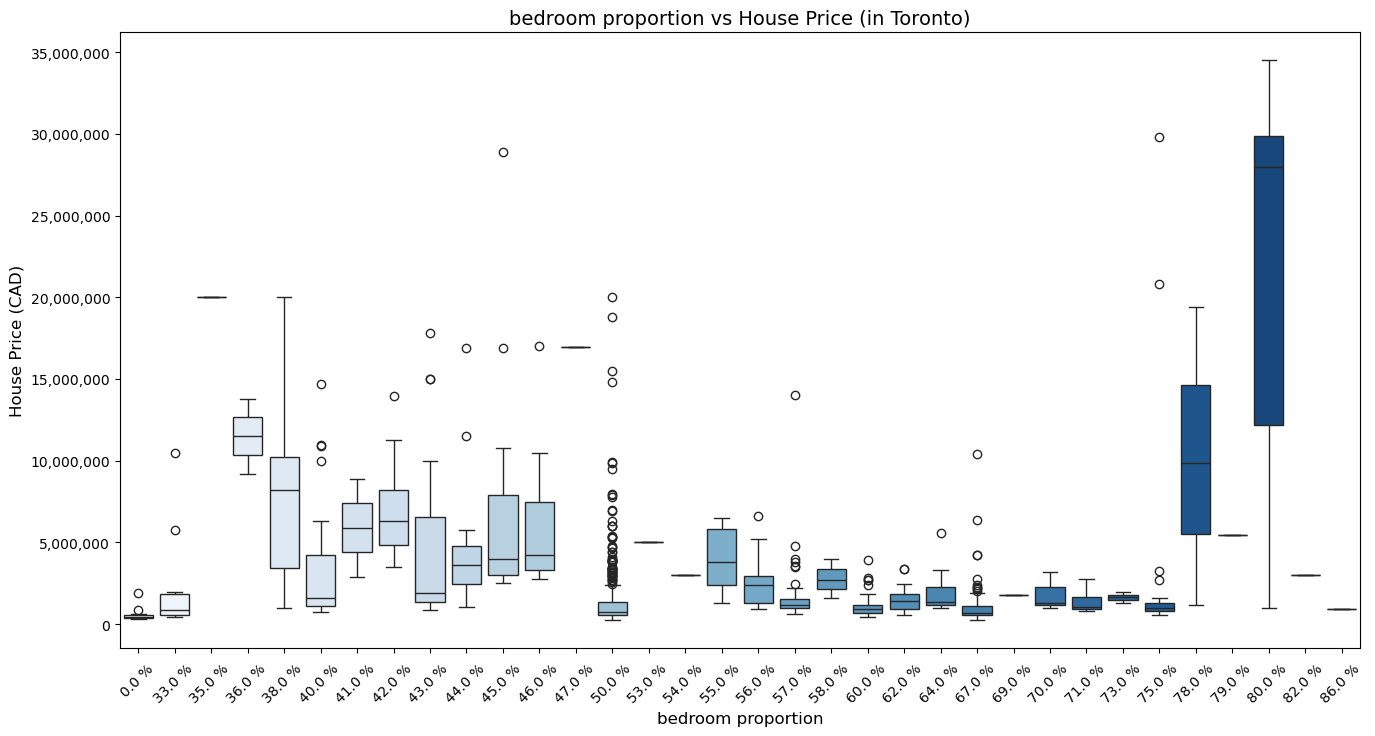

In [10]:
# Plot bed proportion vs house price
# sort the dataframe by bed proportion
bed_proportion_sorted = T_house_data.sort_values(by='bed_proportion')

# box plot for bed proportion vs house price
plt.figure(figsize=(16, 8))
sns.boxplot(x='bed_proportion', y='price', data=bed_proportion_sorted, palette='Blues')
plt.title('bedroom proportion vs House Price (in Toronto)', fontsize=14)
plt.xlabel('bedroom proportion', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(rotation=45)
plt.show()

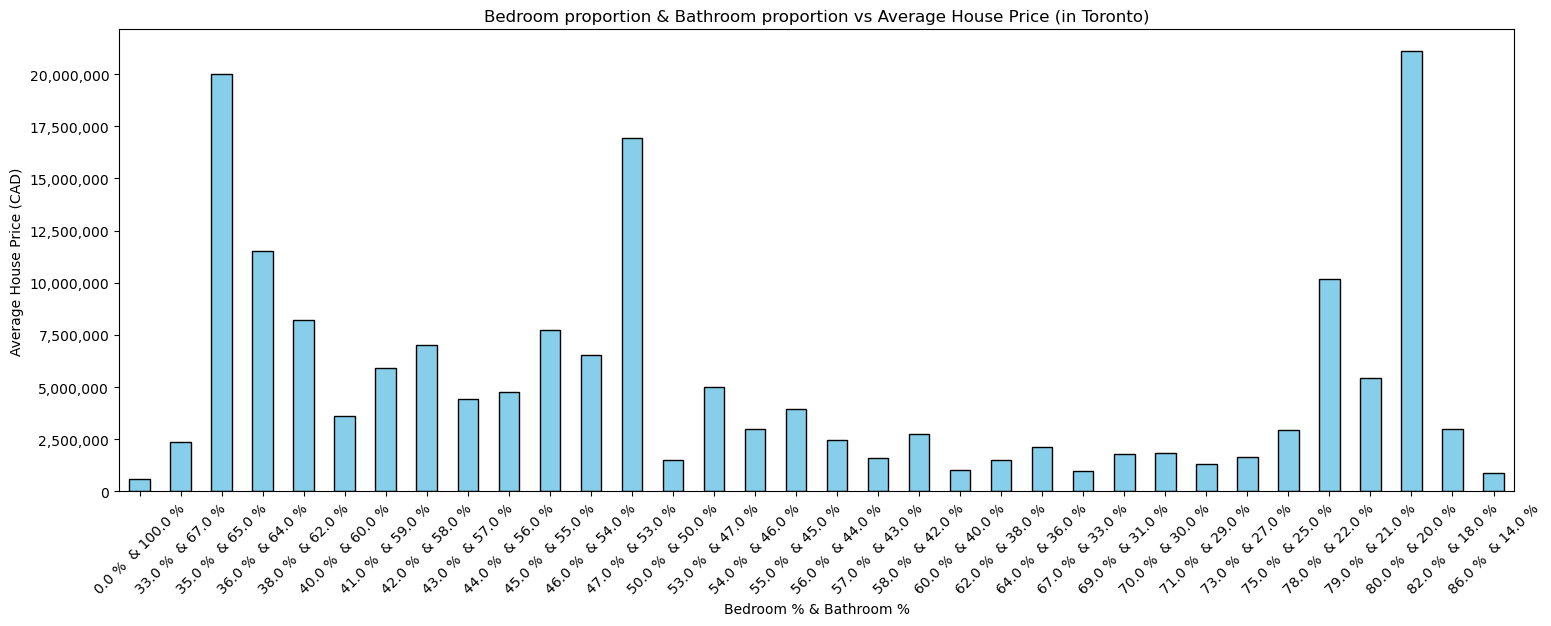

In [11]:
# Plot bedroom proportion, bathroom proportion vs house price
# Group by the 'bed/bath_proportion' and calculate the mean price
beds_baths_ppt_counts = T_house_data.groupby('bed/bath_proportion')['price'].mean()

# Sort the results by ratio for better visualization
beds_baths_ppt_counts = beds_baths_ppt_counts.sort_index()

# create the bar plot
plt.figure(figsize=(18, 6))
beds_baths_ppt_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bedroom proportion & Bathroom proportion vs Average House Price (in Toronto)')
plt.xlabel('Bedroom % & Bathroom %')
plt.ylabel('Average House Price (CAD)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# show the plot
plt.xticks(rotation=45)
plt.show()

##### Now, let's see how crime counts can affect the house price

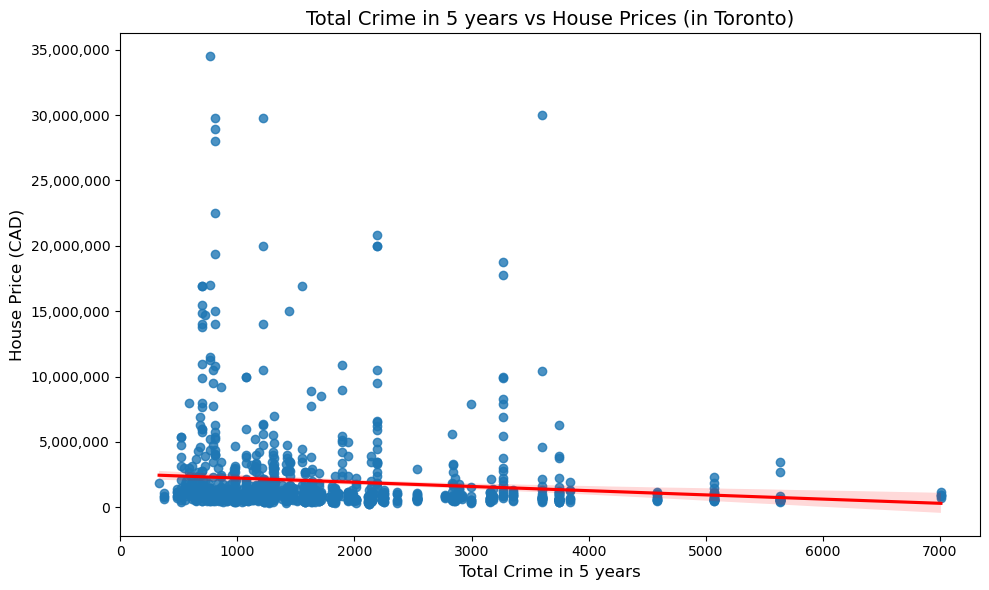

In [12]:
# sort the dataframe by total crimes occurs in 5 years
T_total_crime_sorted = T_house_data.sort_values(by='total_crimes (2020-2024)', ascending = False)

# creat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=T_total_crime_sorted, x='total_crimes (2020-2024)', y='price', line_kws={'color': 'red'})
plt.title('Total Crime in 5 years vs House Prices (in Toronto)', fontsize=14)
plt.xlabel('Total Crime in 5 years', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()


##### What about severe / moderate / minor crime counts affects on house price? Let's create some plots to visualize them

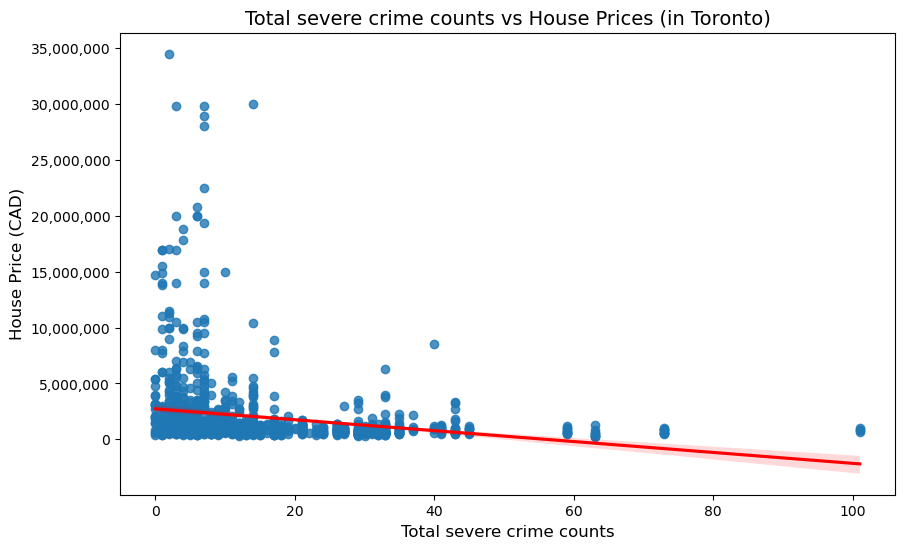

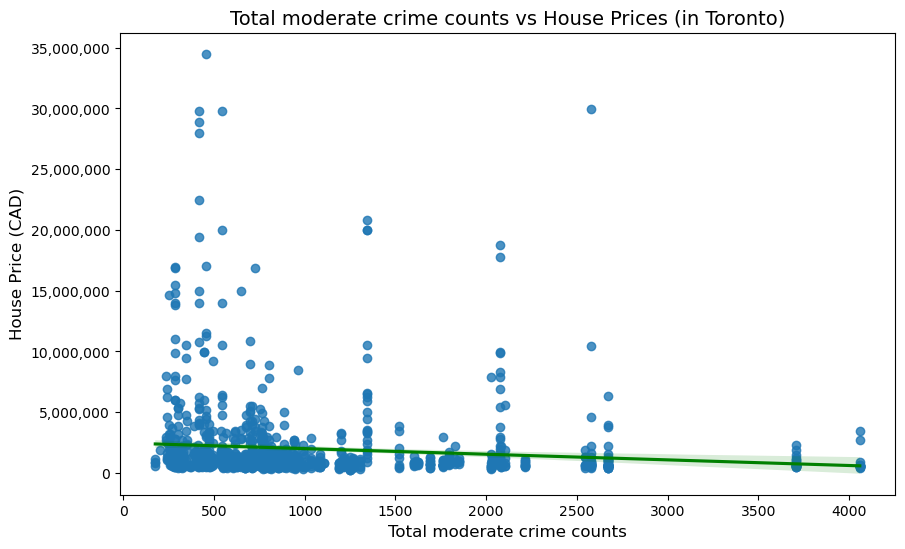

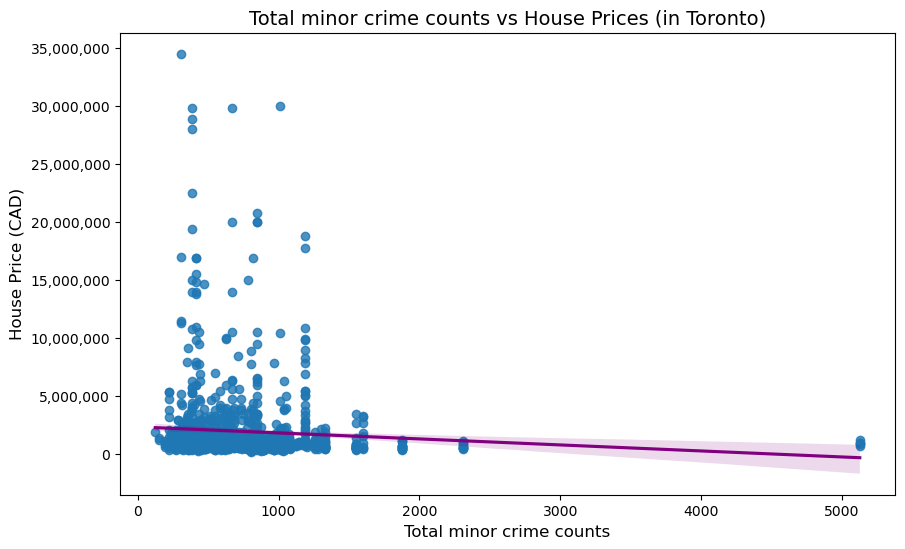

In [13]:
# assign the column name for the crimes to a list
crime_list = ['total_severe_crimes (2020-2024)', 'total_moderate_crimes (2020-2024)', 'total_minor_crimes (2020-2024)']

# use different scatter line color for each crime type
scatterline_color = ['red', 'green', 'purple']

# assign the plot x label name to a list
xlabel_list = ['Total severe crime counts', 'Total moderate crime counts', 'Total minor crime counts']

for i in range(3):
    # sort the dataframe by current crime type
    T_crime_sorted = T_house_data.sort_values(by= crime_list[i], ascending = False)

    # create the scatter plot 
    plt.figure(figsize=(10, 6))
    sns.regplot(data=T_crime_sorted, x=crime_list[i], y='price', line_kws={'color': scatterline_color[i]})
    plt.title(xlabel_list[i] + ' vs House Prices (in Toronto)', fontsize=14)
    plt.xlabel(xlabel_list[i], fontsize=12)
    plt.ylabel('House Price (CAD)', fontsize=12)
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


##### We also want to analyze the income level and neighbourhood relationship

In [14]:
# Let's create some plots for income class and neighbouhood in Toronto
income_columns = ['class 6g', 'class 5g', 'class 4g', 'class 3g', 'class 2g', 'class 1g']
# group the dataframe by neighbourhood
unique_neighbourhoods = T_house_data.groupby('neighbourhood_left')[income_columns].mean()

# add more columns for income level proportation
unique_neighbourhoods['total_population'] = unique_neighbourhoods.sum(axis=1)
for column in income_columns:
    unique_neighbourhoods[column + ' %'] = round (unique_neighbourhoods[column] / unique_neighbourhoods['total_population'] * 100)

# add high income, medium income, and low income population % column
unique_neighbourhoods['high_income_population(%)'] = unique_neighbourhoods['class 1g %'] + unique_neighbourhoods['class 2g %']
unique_neighbourhoods['medium_income_population(%)'] = unique_neighbourhoods['class 3g %'] + unique_neighbourhoods['class 4g %']
unique_neighbourhoods['low_income_population(%)'] = unique_neighbourhoods['class 5g %'] + unique_neighbourhoods['class 6g %']

unique_neighbourhoods.head(20)


,class 6g,class 5g,class 4g,class 3g,class 2g,class 1g,total_population,class 6g %,class 5g %,class 4g %,class 3g %,class 2g %,class 1g %,high_income_population(%),medium_income_population(%),low_income_population(%)
neighbourhood_left,,,,,,,,,,,,,,,,
agincourt north,9005.0,7485.0,1960.0,2020.0,780.0,175.0,21425.0,42.0,35.0,9.0,9.0,4.0,1.0,5.0,18.0,77.0
agincourt south malvern west,7035.0,6535.0,2085.0,2160.0,800.0,270.0,18885.0,37.0,35.0,11.0,11.0,4.0,1.0,5.0,22.0,72.0
alderwood,2535.0,3240.0,1335.0,2455.0,1110.0,530.0,11205.0,23.0,29.0,12.0,22.0,10.0,5.0,15.0,34.0,52.0
annex,5835.0,6375.0,3000.0,8645.0,2690.0,3840.0,30385.0,19.0,21.0,10.0,28.0,9.0,13.0,22.0,38.0,40.0
avondale,2660.0,2955.0,1430.0,3150.0,1370.0,620.0,12185.0,22.0,24.0,12.0,26.0,11.0,5.0,16.0,38.0,46.0
banbury don mills,5525.0,6190.0,2680.0,6300.0,2285.0,2140.0,25120.0,22.0,25.0,11.0,25.0,9.0,9.0,18.0,36.0,47.0
bathurst manor,3880.0,4160.0,1400.0,2425.0,995.0,570.0,13430.0,29.0,31.0,10.0,18.0,7.0,4.0,11.0,28.0,60.0
bay cloverhill,3375.0,3835.0,1610.0,3595.0,1365.0,1030.0,14810.0,23.0,26.0,11.0,24.0,9.0,7.0,16.0,35.0,49.0
bayview village,4625.0,4910.0,2325.0,4720.0,1805.0,1100.0,19485.0,24.0,25.0,12.0,24.0,9.0,6.0,15.0,36.0,49.0


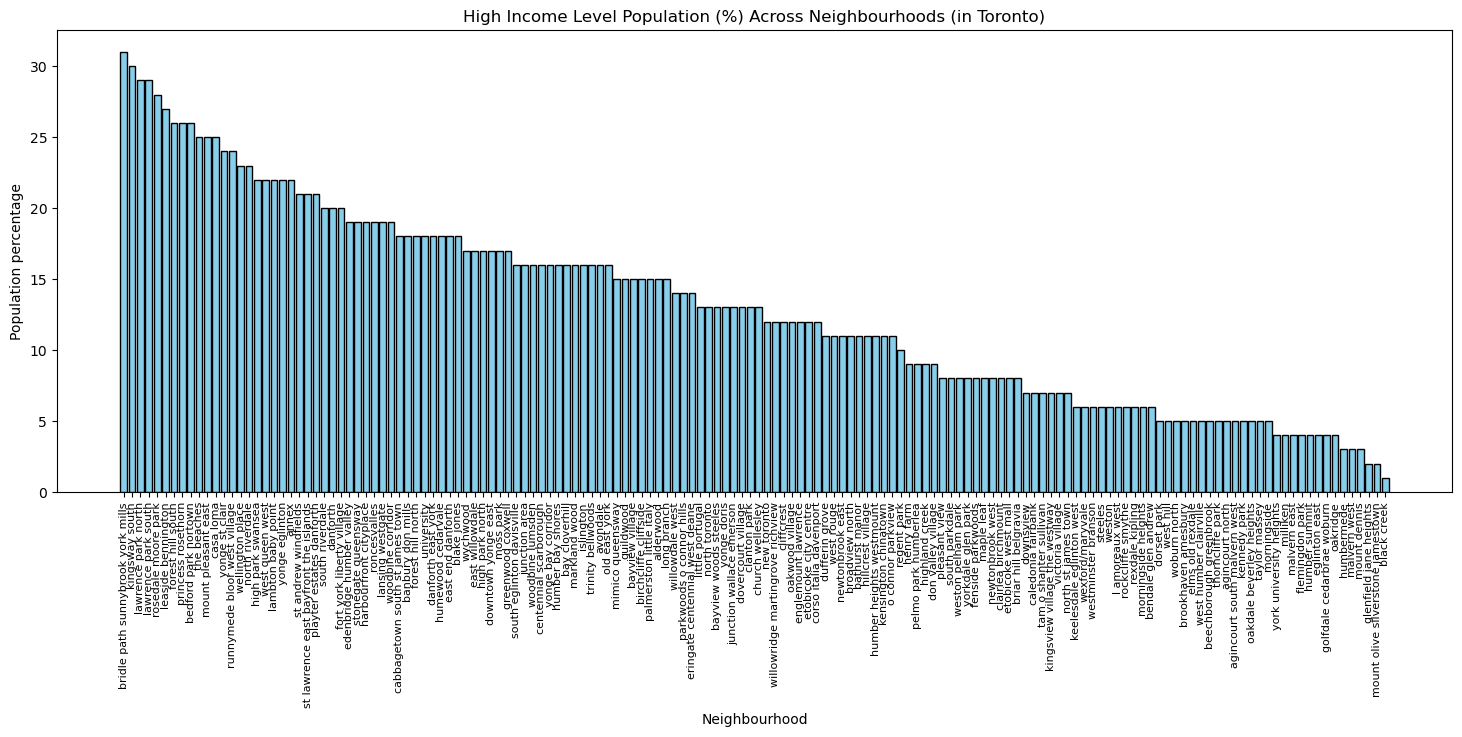

In [15]:
# sort the dataframe to get a better visualization
unique_neighbourhoods = unique_neighbourhoods.sort_values(by="high_income_population(%)", ascending=False)

# let's see which neighbourhood has the highest % of high income population

# create the bar plot
plt.figure(figsize=(18, 6))
plt.bar(unique_neighbourhoods.index, unique_neighbourhoods['high_income_population(%)'], color='skyblue', edgecolor='black')
plt.title('High Income Level Population (%) Across Neighbourhoods (in Toronto)')
plt.xlabel('Neighbourhood')
plt.ylabel('Population percentage')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# show the plot
plt.xticks(rotation=90, fontsize=8)
plt.show()

##### The shape of this plot is very similar to the shape of plot for Average house price by Neighbourhood (in Toronto). Let's add average house price of each neighbourhood in this plot

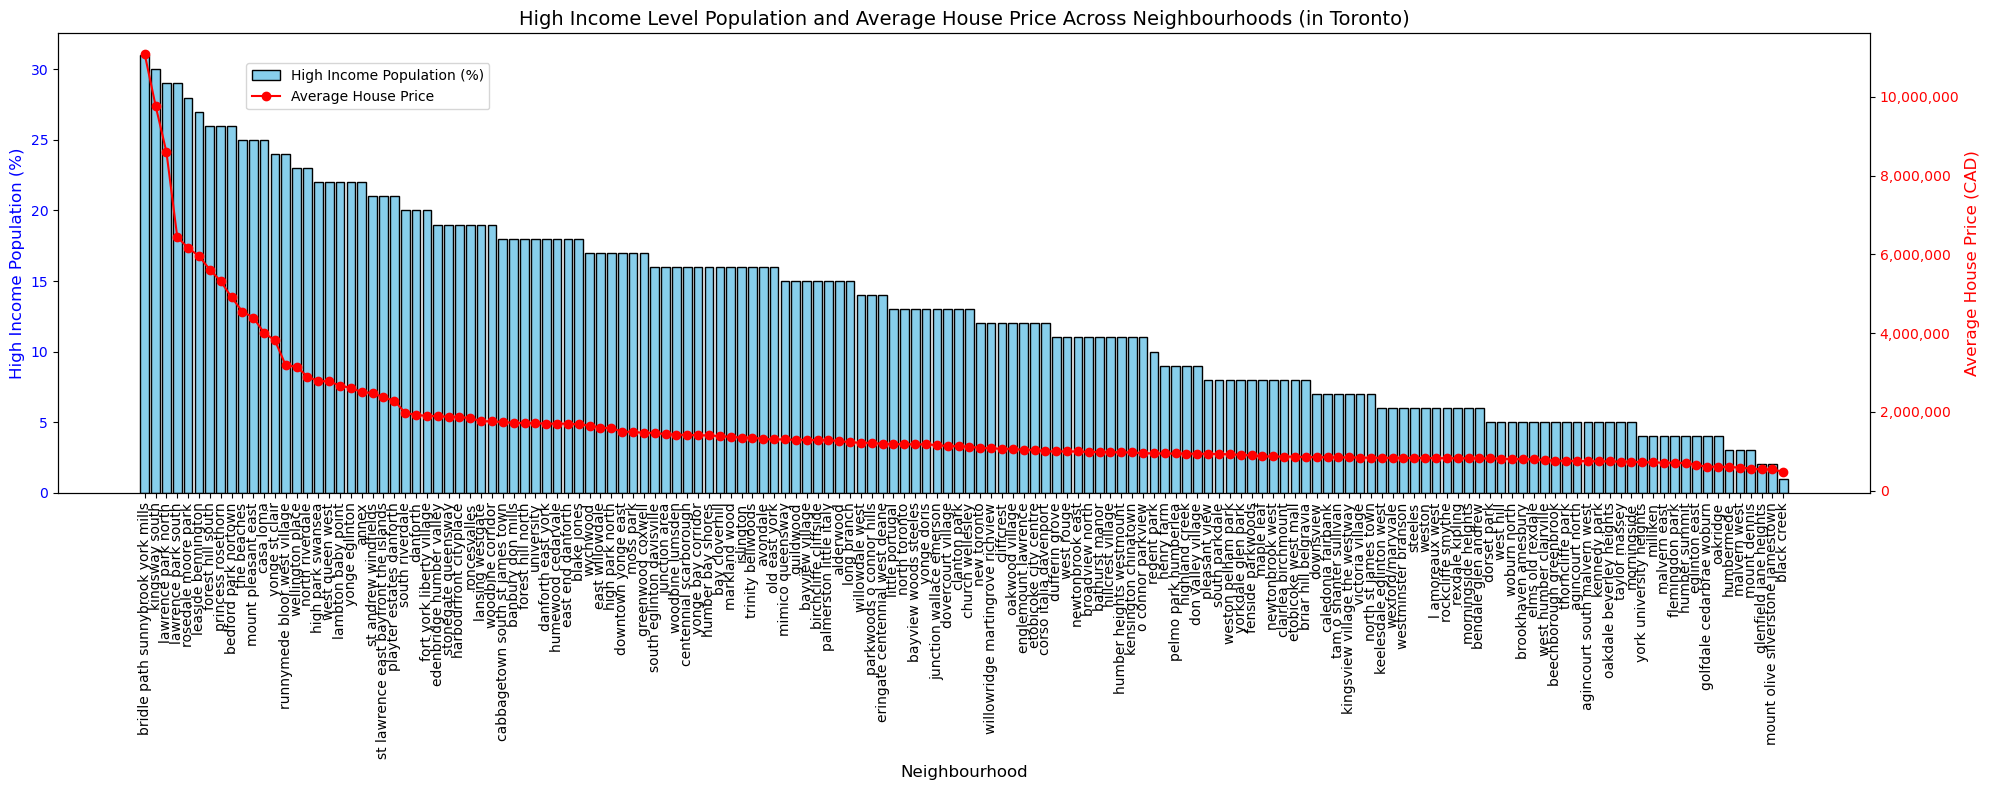

In [16]:
# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(20, 8))

# Bar plot for high-income population percentage
bar = ax1.bar(
    unique_neighbourhoods.index, 
    unique_neighbourhoods['high_income_population(%)'], 
    color='skyblue', 
    edgecolor='black', 
    label='High Income Population (%)'
)

# set up left axis (High Income Level Population %)
ax1.set_title('High Income Level Population and Average House Price Across Neighbourhoods (in Toronto)', fontsize=14)
ax1.set_xlabel('Neighbourhood', fontsize=12)
ax1.set_ylabel('High Income Population (%)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(unique_neighbourhoods.index)))
ax1.set_xticklabels(unique_neighbourhoods.index, rotation=90)

# set up right axis (average house price)
ax2 = ax1.twinx()
line = ax2.plot(
    unique_neighbourhoods.index, 
    avg_price_in_hood, 
    color='red', 
    marker='o', 
    label='Average House Price'
)

ax2.set_ylabel('Average House Price (CAD)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add legends for both plots
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95), bbox_transform=ax1.transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


##### Observation: As % of high income level population getting lower, the avg house price of the neighbourhood also decreases.

### Let's move on to Vancouver dataset (re-use the code for Toronto)

In [17]:
# import Vancouver house csv file and assign it to a dataframe
V_house_data = pd.read_csv('final_merged_van.csv')

# check the df info
V_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unnamed: 0                                              1205 non-null   int64  
 1   neighbourhood_left                                      1205 non-null   object 
 2   unnamed: 0                                              1205 non-null   int64  
 3   street address                                          1205 non-null   object 
 4   latitude                                                1205 non-null   float64
 5   longitude                                               1205 non-null   float64
 6   geometry                                                1205 non-null   object 
 7   price                                                   1205 non-null   int64  
 8   bedrooms                              

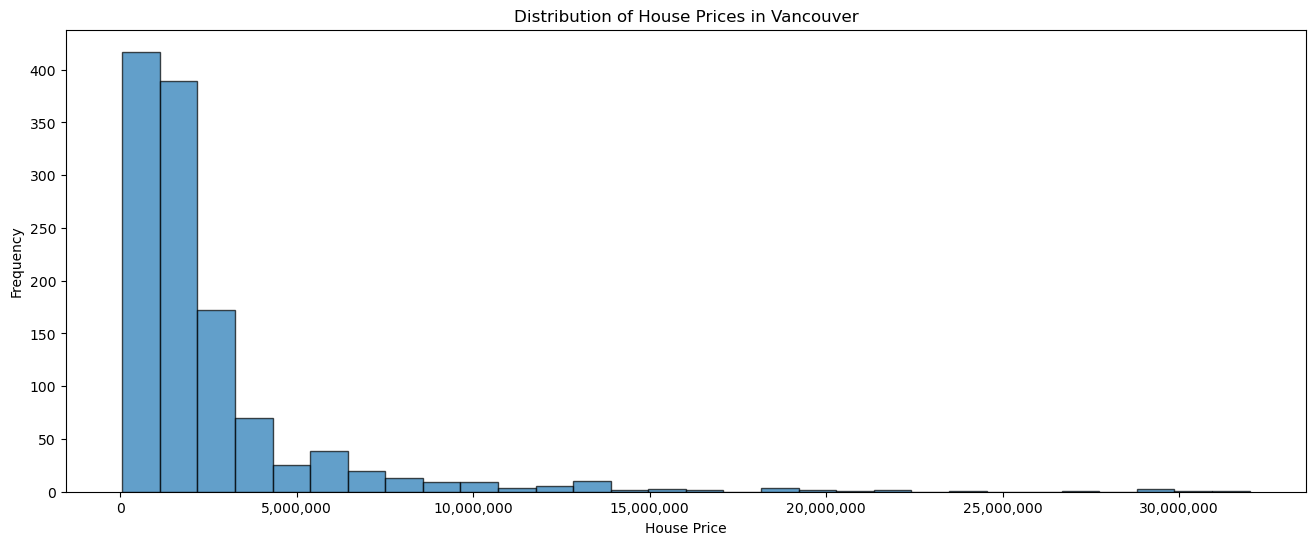

In [18]:
# let's take a look at the house price distribution first
plt.figure(figsize=(16,6))
plt.hist(V_house_data['price'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of House Prices in Vancouver')
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.show()

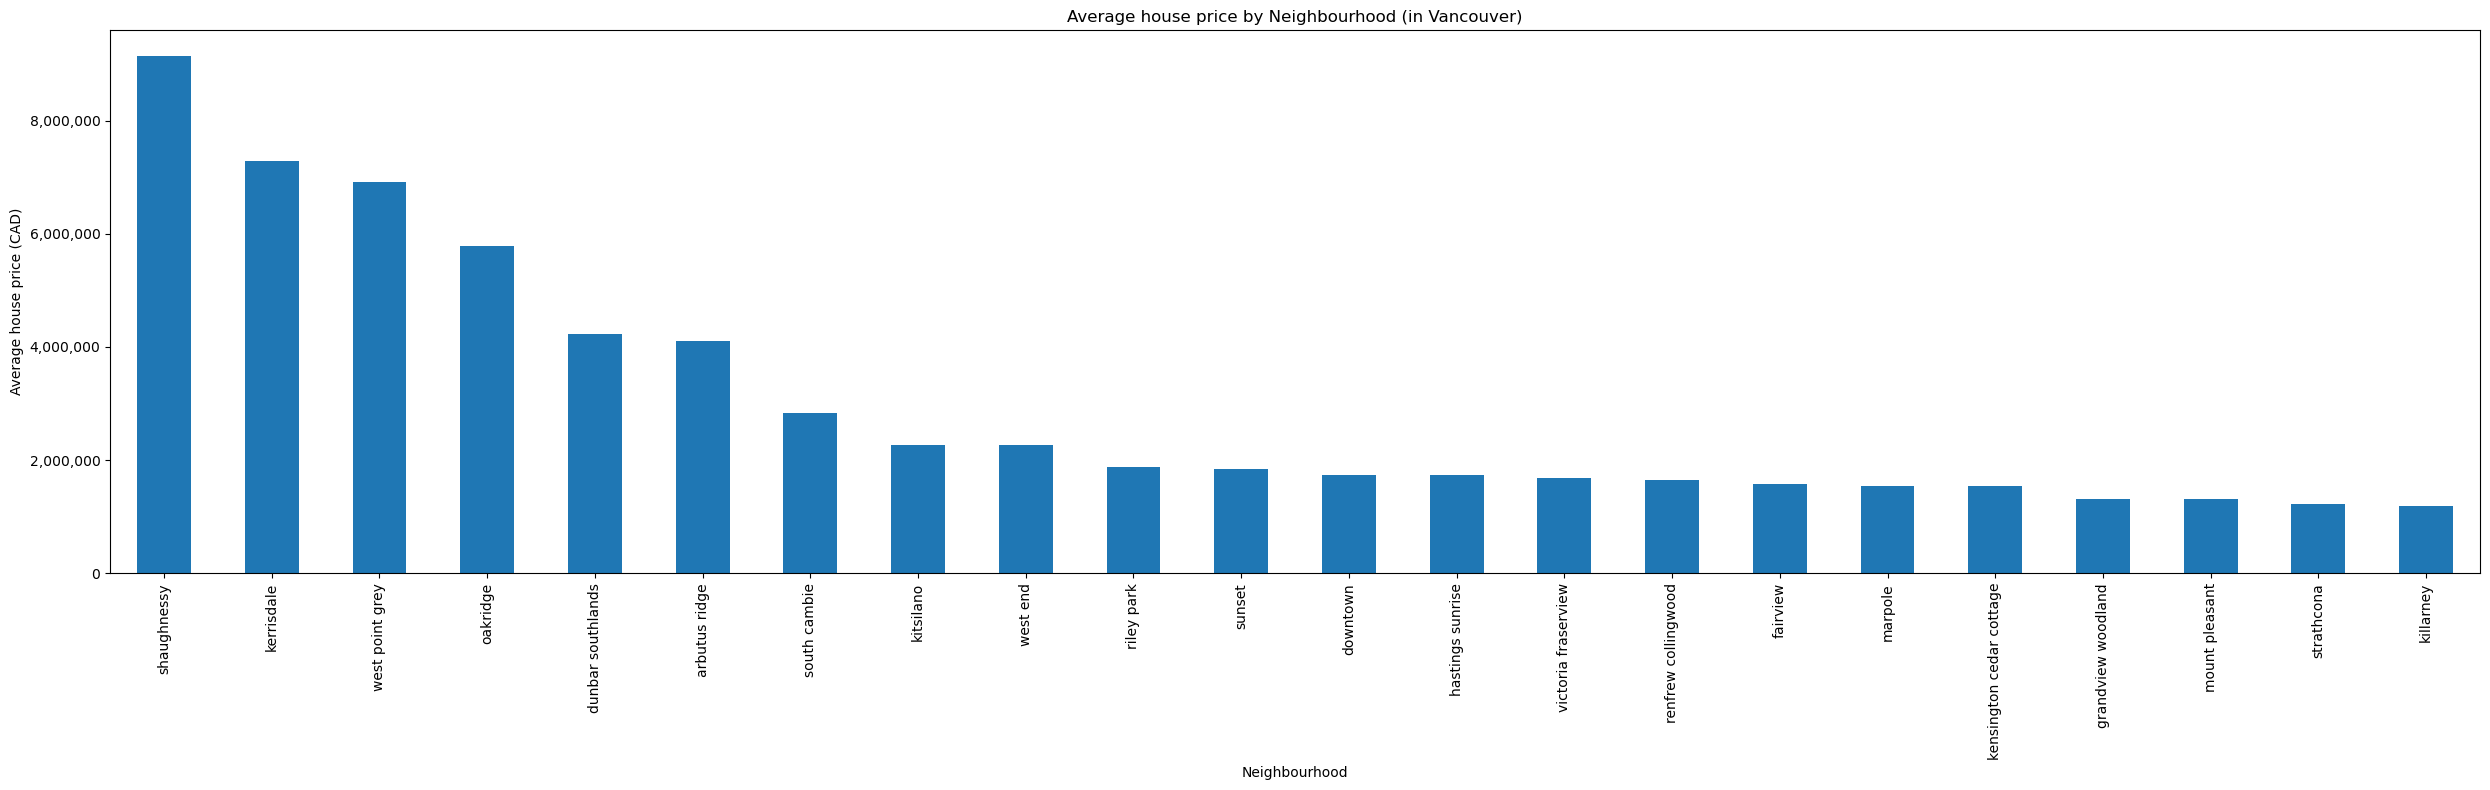

In [19]:
# let's visualize average house price in each neighbourhood

# group by neighbourhood name and calculate the mean house price
avg_price_in_hood = V_house_data.groupby('neighbourhood_left')['price'].mean().sort_values(ascending=False)

# plot the average house price for each neighbourhood
plt.figure(figsize=(25,8))
avg_price_in_hood.plot(kind='bar', legend=False)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.xlabel('Neighbourhood')
plt.ylabel('Average house price (CAD)')
plt.title('Average house price by Neighbourhood (in Vancouver)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_92038/1162272074.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=V_house_data, palette='Blues')
/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_92038/1162272074.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bathrooms', y='price', data=V_house_data, palette='Greens')


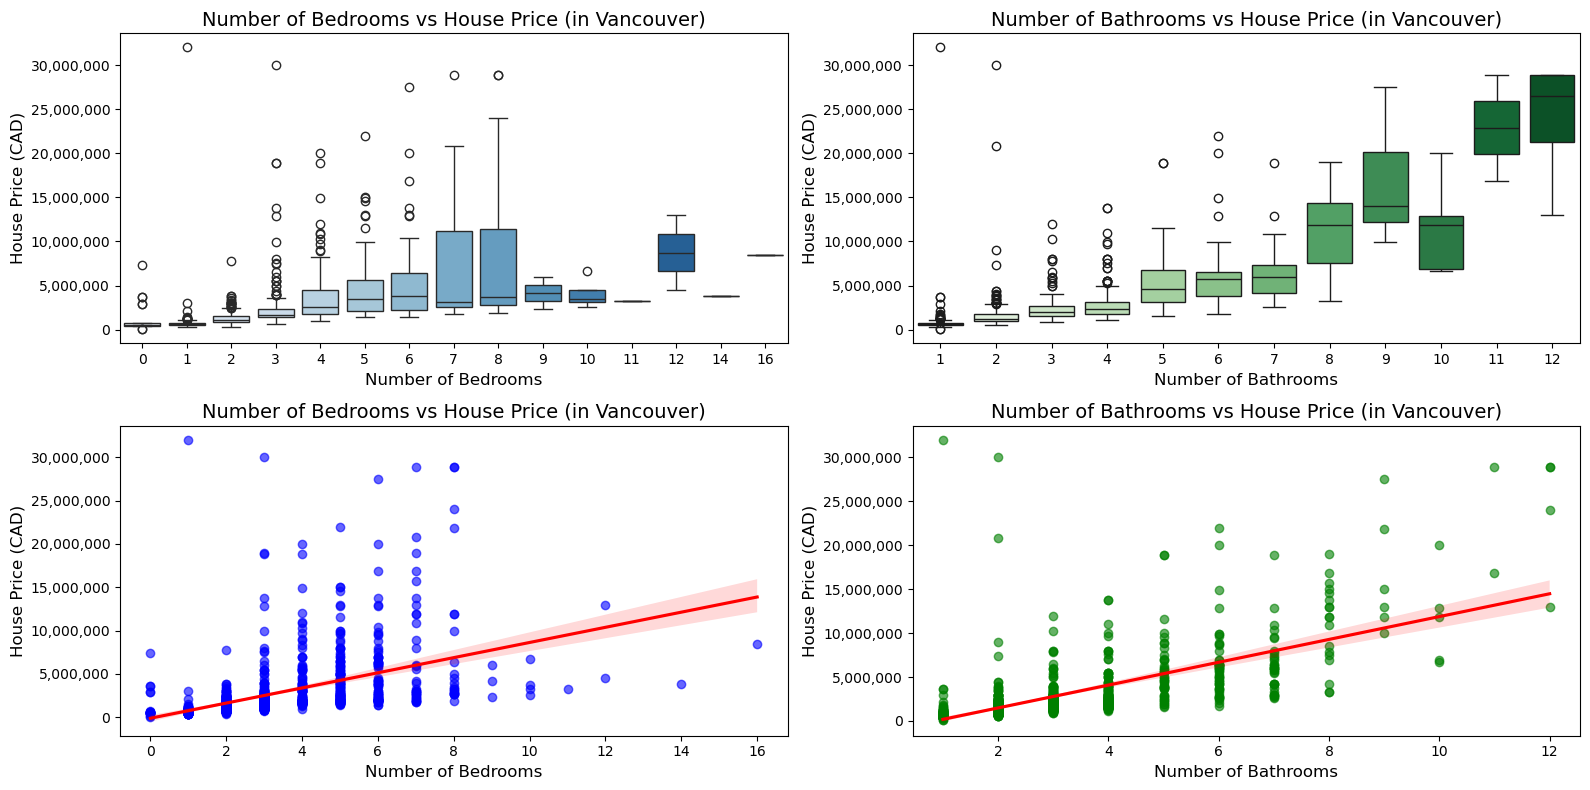

In [20]:
# Let's create box plots and scatter plot with trend line to see how bedrooms and bathrooms can affect house price
# box plot for number of bedrooms vs. house price 
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1) 
sns.boxplot(x='bedrooms', y='price', data=V_house_data, palette='Blues')
plt.title('Number of Bedrooms vs House Price (in Vancouver)', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# box plot for number of bathrooms vs house price
plt.subplot(2, 2, 2)
sns.boxplot(x='bathrooms', y='price', data=V_house_data, palette='Greens')
plt.title('Number of Bathrooms vs House Price (in Vancouver)', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# scatter plot for number of bedrooms vs house price
plt.subplot(2, 2, 3)
sns.regplot(data=V_house_data, x='bedrooms', y='price', scatter_kws= {'color': 'blue', 'alpha': 0.6 }, line_kws={'color': 'red'})
plt.title('Number of Bedrooms vs House Price (in Vancouver)', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


# scatter plot for number of bathrooms vs house price
plt.subplot(2, 2, 4)
sns.regplot(data=V_house_data, x='bathrooms', y='price', scatter_kws={'color': 'green', 'alpha': 0.6 }, line_kws={'color': 'red'})
plt.title('Number of Bathrooms vs House Price (in Vancouver)', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


# Show the plots
plt.tight_layout()
plt.show()

In [21]:
# Let's create a few more features based on bedroom and bathroom 
V_house_data['beds&baths'] = V_house_data['bedrooms'].astype(str) + ' bed & ' + V_house_data['bathrooms'].astype(str) + ' bath'
V_house_data['total_rooms'] = V_house_data['bedrooms'] + V_house_data['bathrooms']
V_house_data['bed_proportion'] = round(V_house_data['bedrooms']/V_house_data['total_rooms']*100).astype(str)+ ' % '
V_house_data['bath_proportion'] = round(V_house_data['bathrooms']/V_house_data['total_rooms']*100).astype(str) + ' %'
V_house_data['bed/bath_proportion'] = V_house_data['bed_proportion'].astype(str) + ' & ' + V_house_data['bath_proportion'].astype(str)

# preview the df
V_house_data.head()

,Unnamed: 0,neighbourhood_left,unnamed: 0,street address,latitude,longitude,geometry,price,bedrooms,bathrooms,...,Total Facilities 1500,public_transit_best_buffer_area_0.5_values,restaurants_best_buffer_area_0.5_values,public_service_best_buffer_area_0.5_values,other_dailylife_facilities_best_buffer_area_0.5_values,beds&baths,total_rooms,bed_proportion,bath_proportion,bed/bath_proportion
0,0,arbutus ridge,38,2795 w 37th ave,49.238765,-123.167839,POINT (-2503174.725616975 6367086.465147689),5750000,5,7,...,85,6,0,0,0,5 bed & 7 bath,12,42.0 %,58.0 %,42.0 % & 58.0 %
1,1,arbutus ridge,78,4422 quesnel dr,49.247018,-123.168268,POINT (-2502625.567097398 6367947.738663315),8680000,5,6,...,55,11,2,0,0,5 bed & 6 bath,11,45.0 %,55.0 %,45.0 % & 55.0 %
2,2,arbutus ridge,125,4101 yew st #304,49.248583,-123.155246,POINT (-2501646.670850805 6367510.574749248),699900,1,1,...,71,12,3,0,2,1 bed & 1 bath,2,50.0 %,50.0 %,50.0 % & 50.0 %
3,3,arbutus ridge,175,2556 w 20th ave,49.254284,-123.163295,POINT (-2501784.918511952 6368460.741179269),4290000,6,5,...,135,2,1,0,1,6 bed & 5 bath,11,55.0 %,45.0 %,55.0 % & 45.0 %
4,4,arbutus ridge,184,2638 w 22nd ave,49.252494,-123.164150,POINT (-2501967.299510082 6368317.397572626),5780000,4,5,...,115,3,2,0,0,4 bed & 5 bath,9,44.0 %,56.0 %,44.0 % & 56.0 %


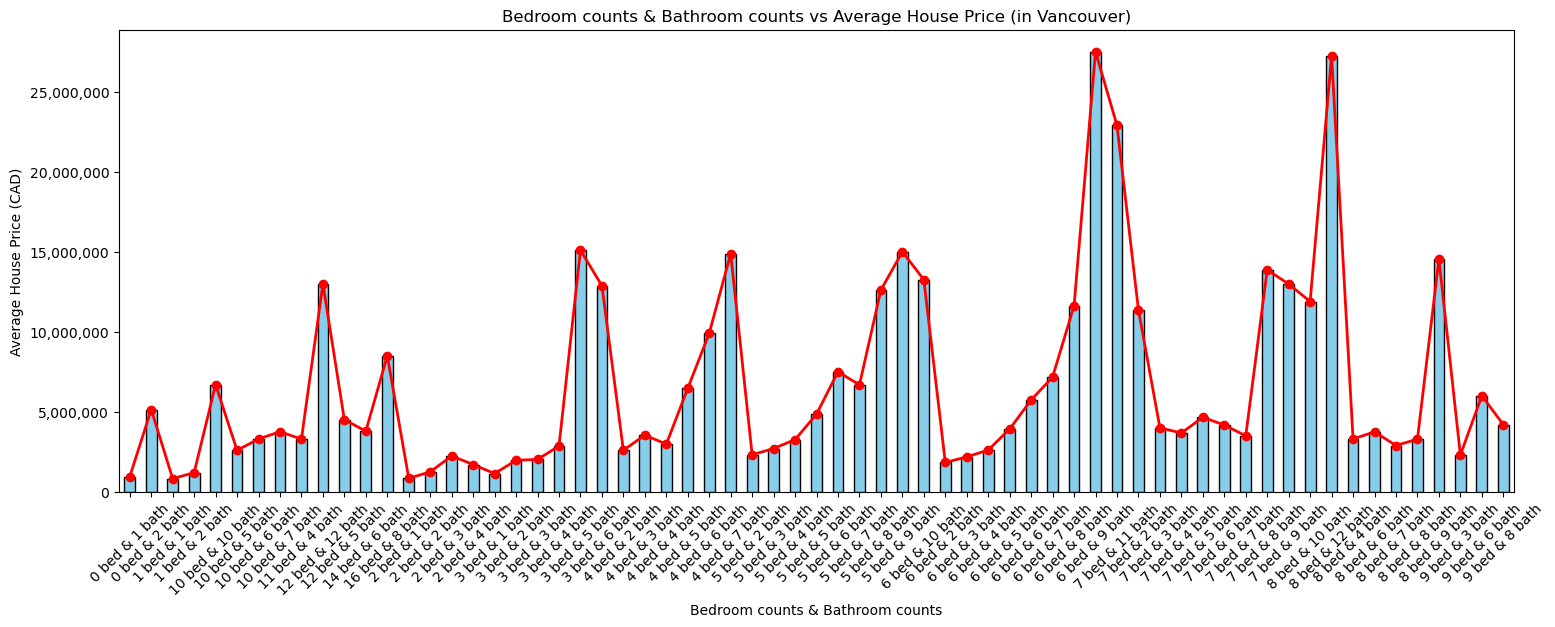

In [22]:
# Now, let's see how # of beds and # of baths combinations can affect the house price
# Group by the 'beds&baths' and calculate the mean price
beds_baths_counts = V_house_data.groupby('beds&baths')['price'].mean()

# Sort the results by ratio for better visualization
beds_baths_counts = beds_baths_counts.sort_index()

# create the bar plot
plt.figure(figsize=(18, 6))
beds_baths_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bedroom counts & Bathroom counts vs Average House Price (in Vancouver)')
plt.xlabel('Bedroom counts & Bathroom counts')
plt.ylabel('Average House Price (CAD)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# add a trend line for the bar plot
plot_x = range(len(beds_baths_counts))
plot_y = beds_baths_counts.values
plt.plot(plot_x, plot_y, color='red', marker='o', linewidth=2, label='Connecting Line')

plt.xticks(rotation=45)
plt.show()

/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_92038/2433668197.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='total_rooms', y='price', data=V_house_data, palette='Blues')


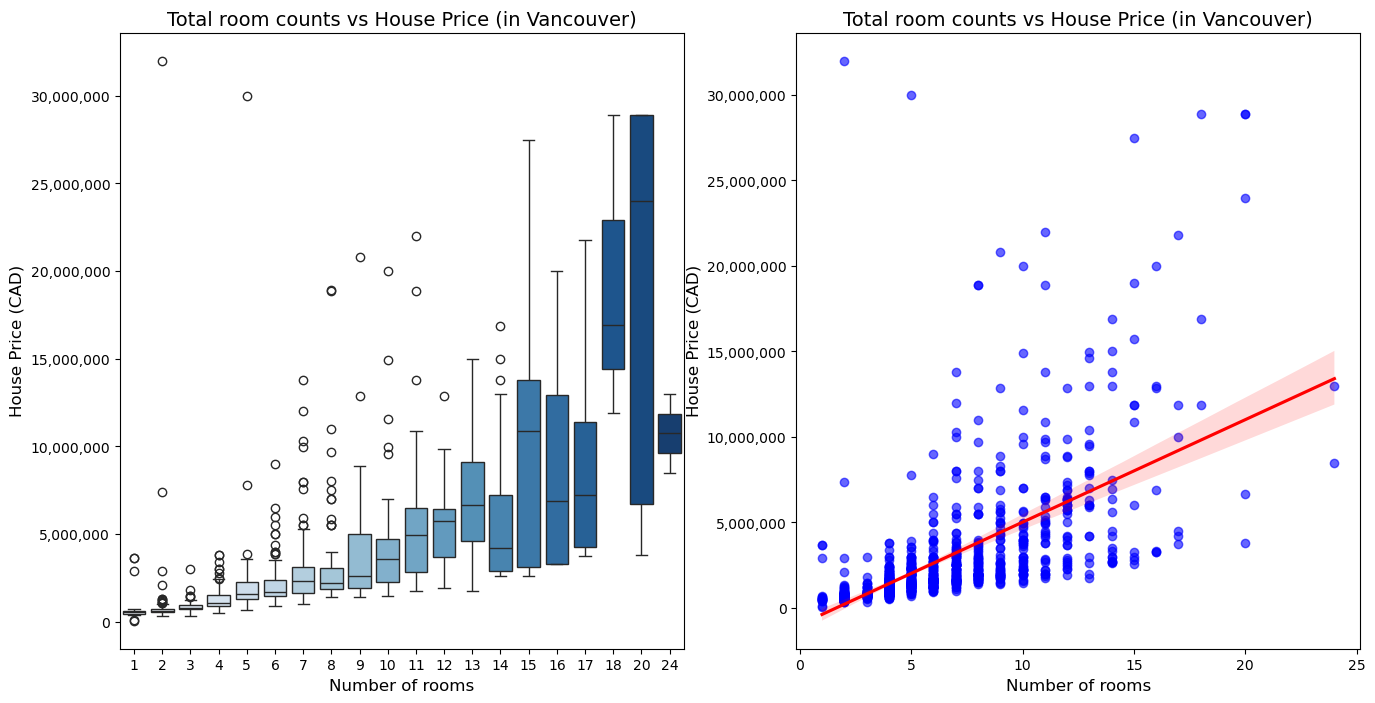

In [23]:
# Plot total room counts vs house price
# box plot for total room counts vs house price
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1) 
sns.boxplot(x='total_rooms', y='price', data=V_house_data, palette='Blues')
plt.title('Total room counts vs House Price (in Vancouver)', fontsize=14)
plt.xlabel('Number of rooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# scatter plot for total room counts vs house price
plt.subplot(1, 2, 2)
sns.regplot(data=V_house_data, x='total_rooms', y='price', scatter_kws= {'color': 'blue', 'alpha': 0.6 }, line_kws={'color': 'red'})
plt.title('Total room counts vs House Price (in Vancouver)', fontsize=14)
plt.xlabel('Number of rooms', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

/var/folders/wq/3s798gjn2417jfrpkst87sw40000gn/T/ipykernel_92038/2762415760.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bed_proportion', y='price', data=bed_proportion_sorted, palette='Blues')


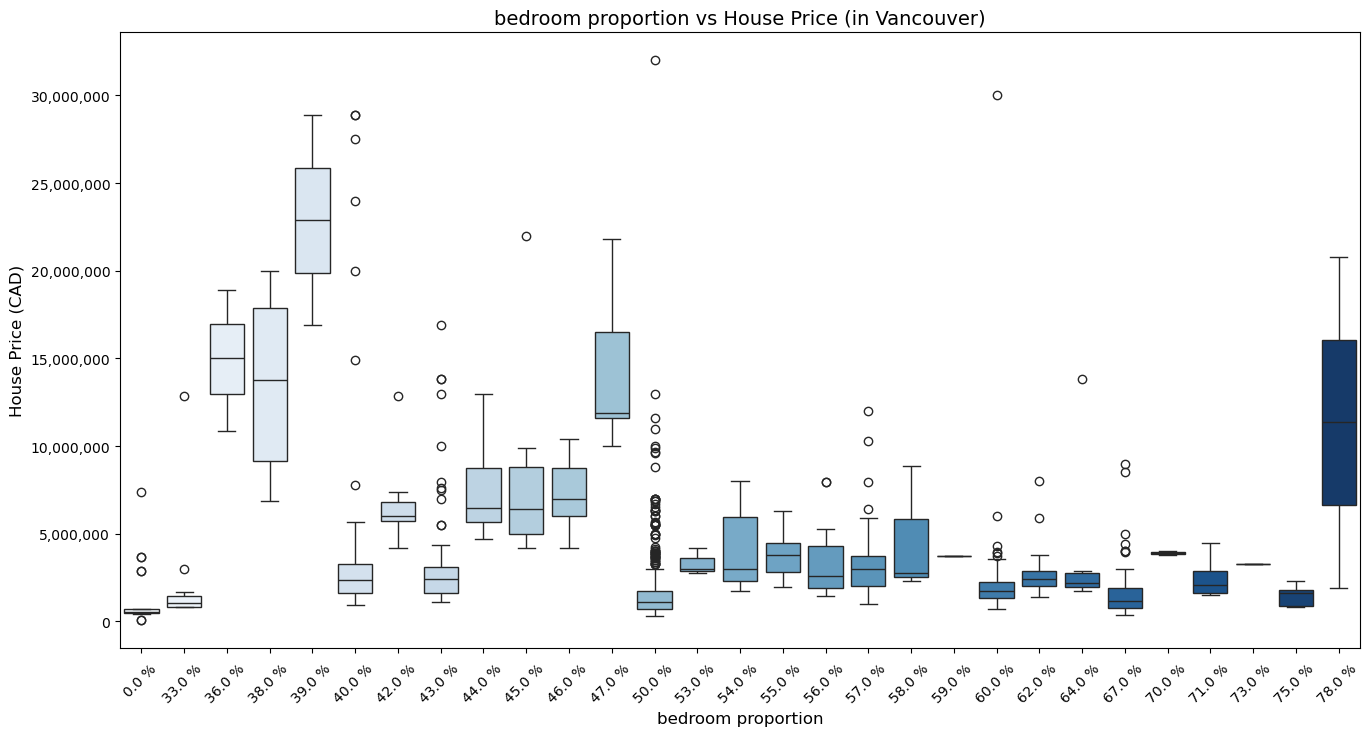

In [24]:
# Plot bed proportion vs house price
# sort the dataframe by bed proportion
bed_proportion_sorted = V_house_data.sort_values(by='bed_proportion')

# box plot for bed proportion vs house price
plt.figure(figsize=(16, 8))
sns.boxplot(x='bed_proportion', y='price', data=bed_proportion_sorted, palette='Blues')
plt.title('bedroom proportion vs House Price (in Vancouver)', fontsize=14)
plt.xlabel('bedroom proportion', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xticks(rotation=45)
plt.show()

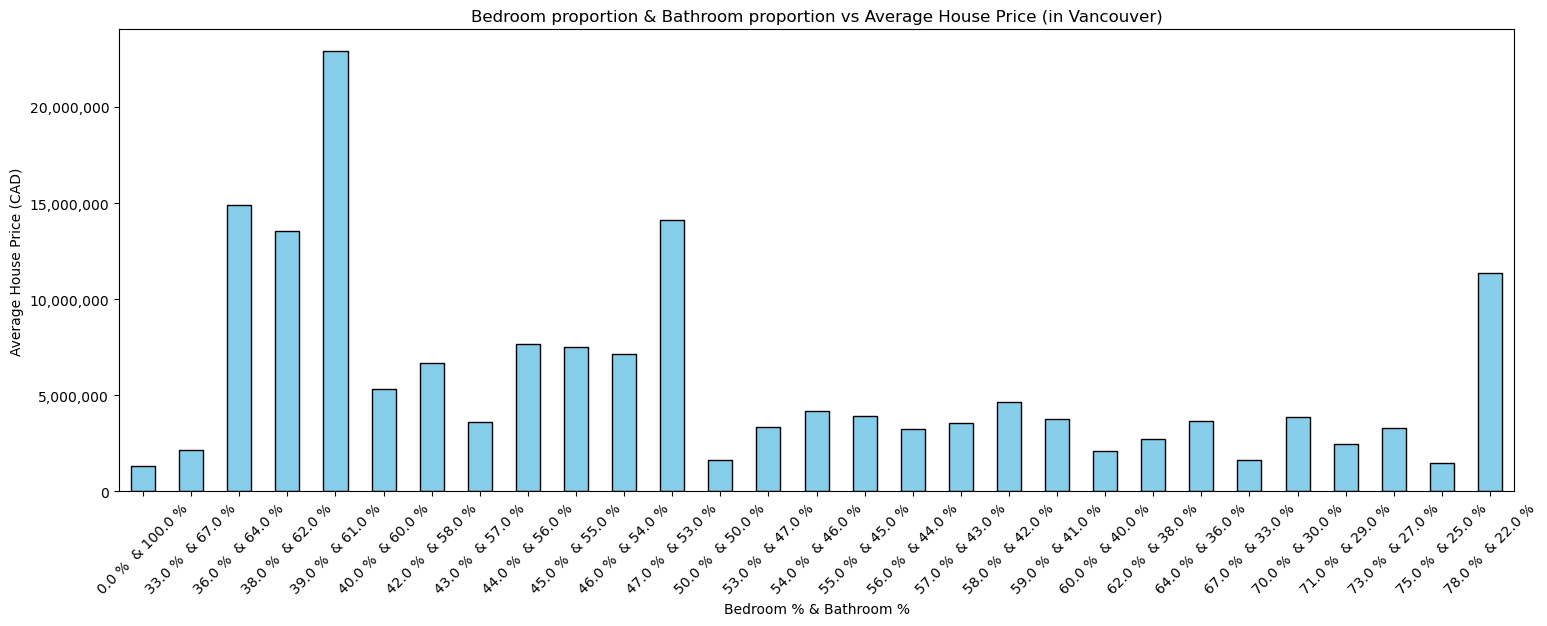

In [25]:
# Plot bedroom proportion, bathroom proportion vs house price
# Group by the 'bed/bath_proportion' and calculate the mean price
beds_baths_ppt_counts = V_house_data.groupby('bed/bath_proportion')['price'].mean()

# Sort the results by ratio for better visualization
beds_baths_ppt_counts = beds_baths_ppt_counts.sort_index()

# create the bar plot
plt.figure(figsize=(18, 6))
beds_baths_ppt_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bedroom proportion & Bathroom proportion vs Average House Price (in Vancouver)')
plt.xlabel('Bedroom % & Bathroom %')
plt.ylabel('Average House Price (CAD)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# show the plot
plt.xticks(rotation=45)
plt.show()

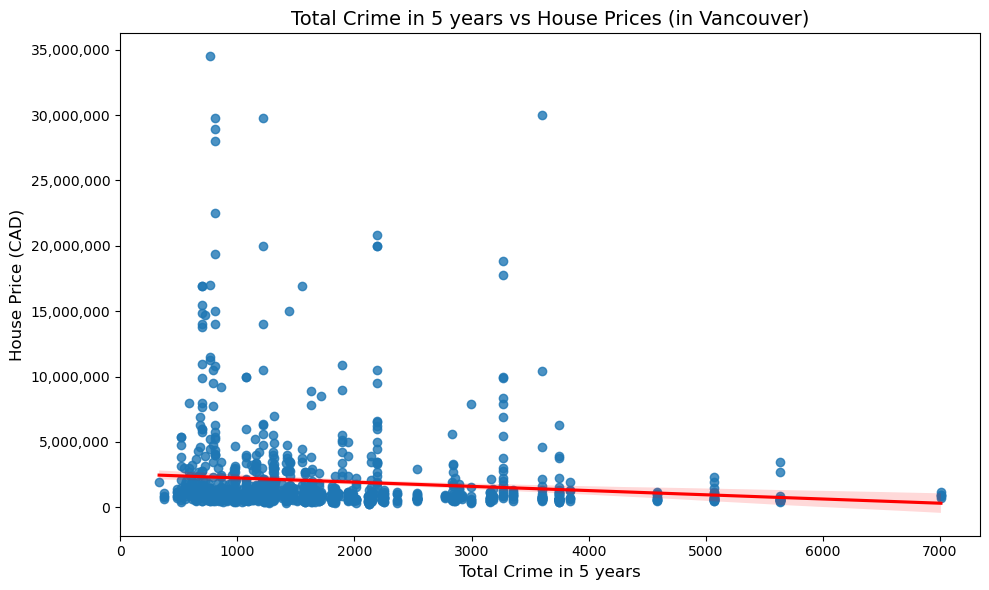

In [26]:
# sort the dataframe by total crimes occurs in 5 years
V_total_crime_sorted = V_house_data.sort_values(by='total_crimes (2020-2024)', ascending = False)

# creat scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(data=T_total_crime_sorted, x='total_crimes (2020-2024)', y='price', line_kws={'color': 'red'})
plt.title('Total Crime in 5 years vs House Prices (in Vancouver)', fontsize=14)
plt.xlabel('Total Crime in 5 years', fontsize=12)
plt.ylabel('House Price (CAD)', fontsize=12)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

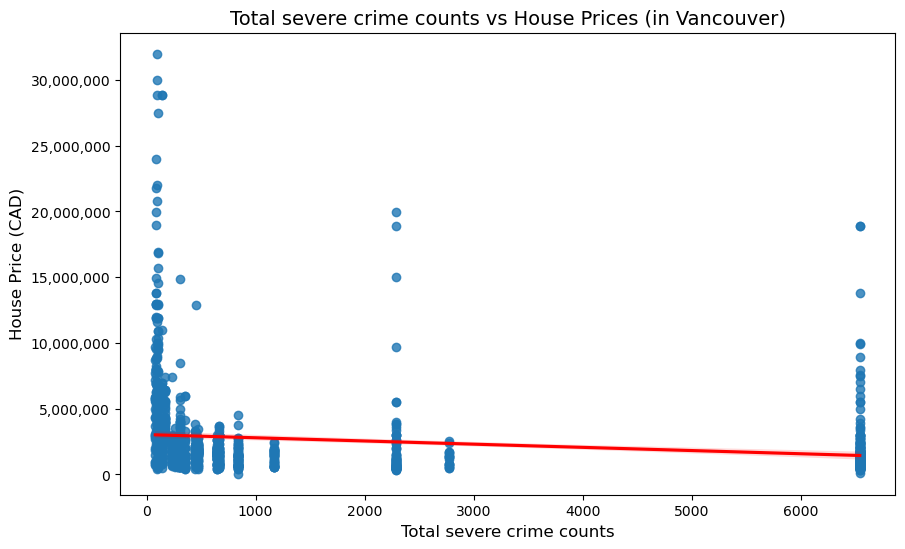

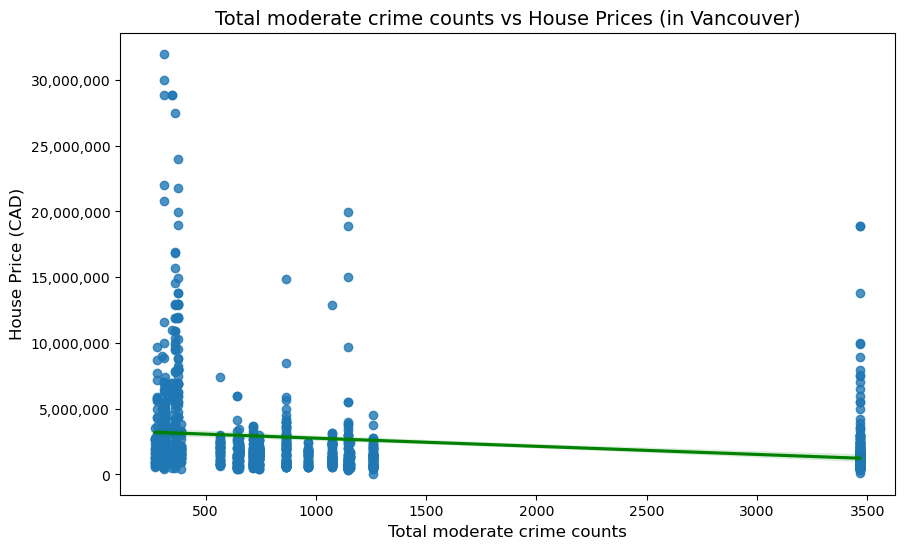

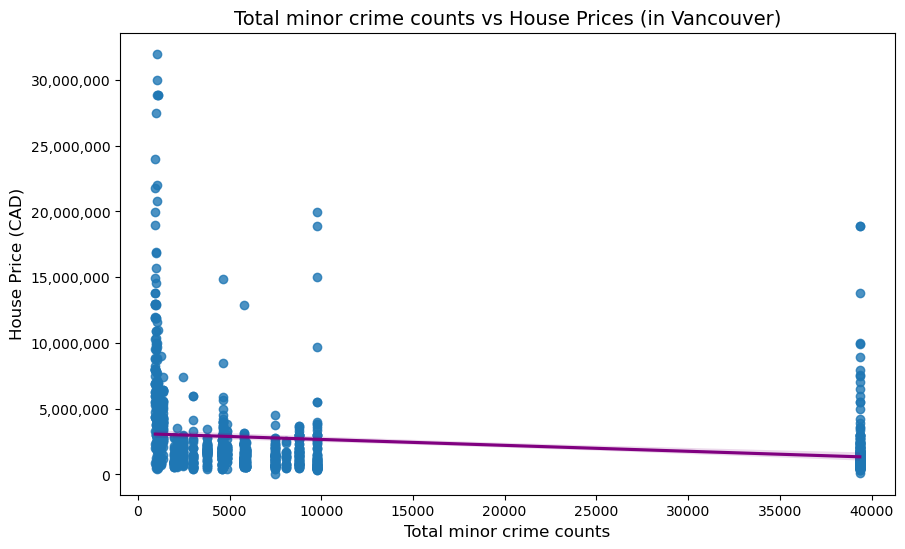

In [27]:
# assign the column name for the crimes to a list
crime_list = ['total_severe_crimes (2020-2024)', 'total_moderate_crimes (2020-2024)', 'total_minor_crimes (2020-2024)']

# use different scatter line color for each crime type
scatterline_color = ['red', 'green', 'purple']

# assign the plot x label name to a list
xlabel_list = ['Total severe crime counts', 'Total moderate crime counts', 'Total minor crime counts']

for i in range(3):
    # sort the dataframe by current crime type
    V_crime_sorted = V_house_data.sort_values(by= crime_list[i], ascending = False)

    # create the scatter plot 
    plt.figure(figsize=(10, 6))
    sns.regplot(data=V_crime_sorted, x=crime_list[i], y='price', line_kws={'color': scatterline_color[i]})
    plt.title(xlabel_list[i] + ' vs House Prices (in Vancouver)', fontsize=14)
    plt.xlabel(xlabel_list[i], fontsize=12)
    plt.ylabel('House Price (CAD)', fontsize=12)
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))


In [28]:
# Let's create some plots for income class and neighbouhood in Vancouver
income_columns = ['class 6g', 'class 5g', 'class 4g', 'class 3g', 'class 2g', 'class 1g']
# group the dataframe by neighbourhood
unique_neighbourhoods = V_house_data.groupby('neighbourhood_left')[income_columns].mean()

# add more columns for income level proportation
unique_neighbourhoods['total_population'] = unique_neighbourhoods.sum(axis=1)
for column in income_columns:
    unique_neighbourhoods[column + ' %'] = round (unique_neighbourhoods[column] / unique_neighbourhoods['total_population'] * 100)

# add high income, medium income, and low income group % column
unique_neighbourhoods['high_income_population(%)'] = unique_neighbourhoods['class 1g %'] + unique_neighbourhoods['class 2g %']
unique_neighbourhoods['medium_income_population(%)'] = unique_neighbourhoods['class 3g %'] + unique_neighbourhoods['class 4g %']
unique_neighbourhoods['low_income_population(%)'] = unique_neighbourhoods['class 5g %'] + unique_neighbourhoods['class 6g %']

unique_neighbourhoods.head(20)

,class 6g,class 5g,class 4g,class 3g,class 2g,class 1g,total_population,class 6g %,class 5g %,class 4g %,class 3g %,class 2g %,class 1g %,high_income_population(%),medium_income_population(%),low_income_population(%)
neighbourhood_left,,,,,,,,,,,,,,,,
arbutus ridge,3185.0,2670.0,1090.0,2455.0,855.0,870.0,11125.0,29.0,24.0,10.0,22.0,8.0,8.0,16.0,32.0,53.0
downtown,12880.0,12295.0,6645.0,13025.0,5180.0,3405.0,53430.0,24.0,23.0,12.0,24.0,10.0,6.0,16.0,36.0,47.0
dunbar southlands,3755.0,3360.0,1525.0,4725.0,1555.0,1965.0,16885.0,22.0,20.0,9.0,28.0,9.0,12.0,21.0,37.0,42.0
fairview,6605.0,8615.0,4350.0,6895.0,2590.0,1520.0,30575.0,22.0,28.0,14.0,23.0,8.0,5.0,13.0,37.0,50.0
grandview woodland,8725.0,7490.0,2715.0,3205.0,1260.0,485.0,23880.0,37.0,31.0,11.0,13.0,5.0,2.0,7.0,24.0,68.0
hastings sunrise,10705.0,7660.0,2620.0,2855.0,1065.0,440.0,25345.0,42.0,30.0,10.0,11.0,4.0,2.0,6.0,21.0,72.0
kensington cedar cottage,14465.0,11600.0,3455.0,4330.0,1620.0,620.0,36090.0,40.0,32.0,10.0,12.0,4.0,2.0,6.0,22.0,72.0
kerrisdale,2945.0,2340.0,1130.0,2735.0,920.0,1130.0,11200.0,26.0,21.0,10.0,24.0,8.0,10.0,18.0,34.0,47.0
killarney,7865.0,6530.0,2270.0,2750.0,980.0,345.0,20740.0,38.0,31.0,11.0,13.0,5.0,2.0,7.0,24.0,69.0


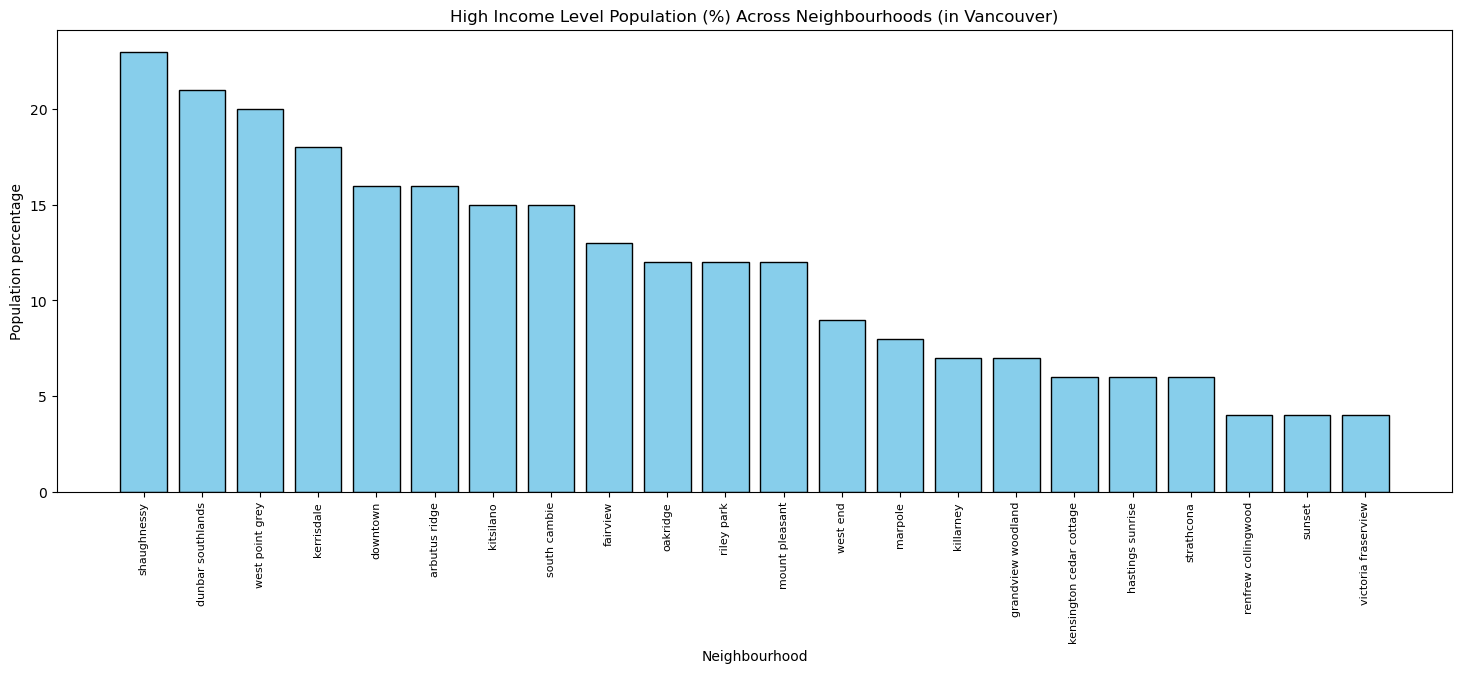

In [29]:
# sort the dataframe to get a better visualization
unique_neighbourhoods = unique_neighbourhoods.sort_values(by="high_income_population(%)", ascending=False)

# let's see which neighbourhood has the highest % of high income population

# create the bar plot
plt.figure(figsize=(18, 6))
plt.bar(unique_neighbourhoods.index, unique_neighbourhoods['high_income_population(%)'], color='skyblue', edgecolor='black')
plt.title('High Income Level Population (%) Across Neighbourhoods (in Vancouver)')
plt.xlabel('Neighbourhood')
plt.ylabel('Population percentage')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# show the plot
plt.xticks(rotation=90, fontsize=8)
plt.show()

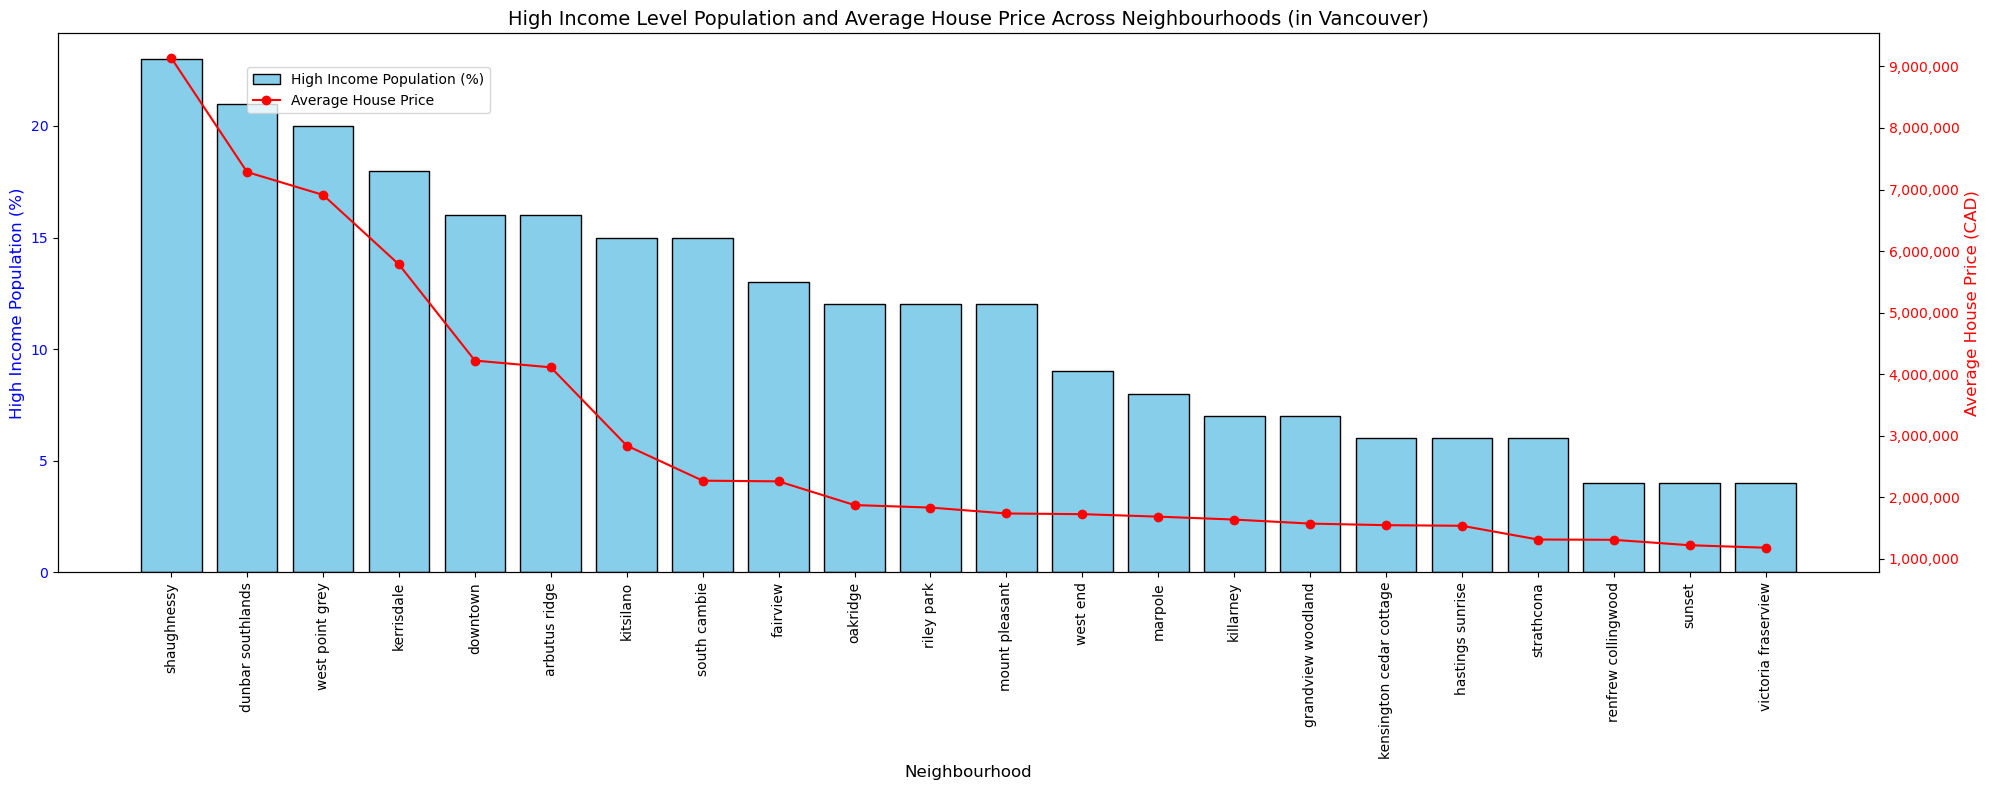

In [30]:
# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(20, 8))

# Bar plot for high-income population percentage
bar = ax1.bar(
    unique_neighbourhoods.index, 
    unique_neighbourhoods['high_income_population(%)'], 
    color='skyblue', 
    edgecolor='black', 
    label='High Income Population (%)'
)

# set up left axis (High Income Level Population %)
ax1.set_title('High Income Level Population and Average House Price Across Neighbourhoods (in Vancouver)', fontsize=14)
ax1.set_xlabel('Neighbourhood', fontsize=12)
ax1.set_ylabel('High Income Population (%)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(range(len(unique_neighbourhoods.index)))
ax1.set_xticklabels(unique_neighbourhoods.index, rotation=90)

# set up right axis (average house price)
ax2 = ax1.twinx()
line = ax2.plot(
    unique_neighbourhoods.index, 
    avg_price_in_hood, 
    color='red', 
    marker='o', 
    label='Average House Price'
)

# Customize the second y-axis (right side)
ax2.set_ylabel('Average House Price (CAD)', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

# Add legends for both plots
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.95), bbox_transform=ax1.transAxes)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()